In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import jensenshannon

from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir

In [2]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [3]:
syn_hh_bn = pd.read_csv(os.path.join(output_dir,"testland", f"final_hh_adjust4.csv"))
syn_pp_bn = pd.read_csv(os.path.join(output_dir,"testland", f"final_pp_adjust4.csv"))
syn_hh_ipu = pd.read_csv(os.path.join(output_dir, "testland","syn_hh_ipu.csv"))
syn_pp_ipu = pd.read_csv(os.path.join(output_dir, "testland","syn_pp_ipu.csv"))

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_2876\2855877364.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  syn_hh_bn = pd.read_csv(os.path.join(output_dir,"testland", f"final_hh_adjust4.csv"))


In [4]:
syn_hh_noad = pd.read_csv(os.path.join(output_dir, f"syn_hh_bn_adjust1_hhsize_POA.csv"))
syn_pp_noad = pd.read_csv(os.path.join(output_dir, f"syn_pp_bn_adjust1_hhsize_POA.csv"))

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_2876\3244105792.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  syn_hh_noad = pd.read_csv(os.path.join(output_dir, f"syn_hh_bn_adjust1_hhsize_POA.csv"))


In [5]:
syn_hh_bn = syn_hh_bn.astype(str)
syn_pp_bn = syn_pp_bn.astype(str)
syn_hh_ipu = syn_hh_ipu.astype(str)
syn_pp_ipu = syn_pp_ipu.astype(str)
syn_hh_noad = syn_hh_noad.astype(str)
syn_pp_noad = syn_pp_noad.astype(str)

In [6]:
marg_hh = pd.read_csv(os.path.join(data_dir,f"hh_marginals_ipu.csv"), header=[0,1])
marg_pp = pd.read_csv(os.path.join(data_dir,f"person_marginals_ipu.csv"), header=[0,1])

In [7]:
hold = marg_hh.columns[marg_hh.columns.get_level_values(0)=="zone_id"]
marg_hh = marg_hh.set_index(hold[0])
marg_hh.index.name = geo_lev
marg_hh

sample_geog hhsize                                   \
     Unnamed: 1_level_1      1     2     3    4    5   6  7  8+   
POA                                                               
3000                  2  10393  8524  2026  656  118  27  4  58   
3002                  2   1035  1019   190  101   38   9  0  55   
3003                  2   1504  1591   476  223   40  11  7  55   
3004                  2   2566  2382   511  227   33   6  5  55   
3006                  2   5113  5033  1280  414   59  13  8  58   
...                 ...    ...   ...   ...  ...  ...  .. ..  ..   
3990                  2      6    20     8    4    3   0  0  55   
3991                  2     37    65    16   19   10   9  0  55   
3992                  2    134   201    72   60   24   9  0  55   
3995                  2   1663  1834   629  451  228  73  8  58   
3996                  2    806  1176   251  299  137  31  6  59   

             dwelltype  ...      hhinc totalvehs                        \
     Flat or Apartment  ... Nil income         0     1     2    3   4+   
POA                     ...                                              
3000             21545  ...       1898     14706  5436   853  412  399   
3002              1852  ...         42       465  1271   556   89   66   
3003              3165  ...        158      1396  1934   429   94   54   
3004              5742  ...        172      1207  3448   867  166   97   
3006             11764  ...        433      4740  5860  1040  192  146   
...                ...  ...        ...       ...   ...   ...  ...  ...   
3990                 0  ...          5        11    11    30   23   21   
3991                 0  ...          7        16    44    78   40   33   
3992                 0  ...          6        12   153   218   93   79   
3995                26  ...         87       370  1946  1704  582  342   
3996                20  ...         54        89  1049  1198  295  134   

            owndwell                                          
     Being Purchased Being Rented Fully Owned Something Else  
POA                                                           
3000            2452        16594        2290            470  
3002             435         1292         678             42  
3003             797         2548         463             99  
3004            1206         3210        1271             98  
3006            2132         8101        1534            211  
...              ...          ...         ...            ...  
3990              16            0          22             58  
3991              51           17          67             76  
3992             229           55         192             79  
3995            1326         1150        2316            152  
3996             687          493        1529             56  

[691 rows x 45 columns]

In [8]:
hold = marg_pp.columns[marg_pp.columns.get_level_values(0)=="zone_id"]
marg_pp = marg_pp.set_index(hold[0])
marg_pp.index.name = geo_lev
marg_pp

age                                                         ...  \
       0-9 10-19 100+  20-29  30-39 40-49 50-59 60-69 70-79 80-89  ...   
POA                                                                ...   
3000  1131  2057    0  21588  10739  3433  2059  1275   619   145  ...   
3002   210   179    0    840   1032   571   614   683   537   165  ...   
3003   428   383    0   2836   2328   921   561   306   163    42  ...   
3004   604   407    9   2432   2928  1530  1111  1048   953   317  ...   
3006  1107   709    0   7932   7118  2452  1454  1108   612   187  ...   
...    ...   ...  ...    ...    ...   ...   ...   ...   ...   ...  ...   
3990     3     7    0      7     13    13    25    24    24     0  ...   
3991    29    46    0     41     45    40    69    57    50    11  ...   
3992   146   144    0    130    156   164   164   232   106    25  ...   
3995  1052  1200    4   1047   1162  1179  1494  1934  1567   687  ...   
3996   654   654    3    368    606   651   780  1267  1062   427  ...   

           persinc                                              \
     $400-599 p.w. $600-799 p.w. $800-999 p.w. Missing/Refused   
POA                                                              
3000          4049          4688          3585            5585   
3002           274           330           239             621   
3003           564           712           604            1185   
3004           983          1107           699            1967   
3006          1460          1933          1709            2693   
...            ...           ...           ...             ...   
3990             8            15             5              22   
3991            39            32            26             105   
3992           140           136            99             311   
3995          1846          1408           781            2459   
3996           793           718           429            1392   

                                    sex        anywork         
     Negative Income Zero Income      F      M       N      Y  
POA                                                            
3000             227        7764  21539  24113   15840  29812  
3002              24         686   2545   2837    1845   3537  
3003              29         620   3906   4070    2581   5395  
3004              36         737   5827   6478    4560   7745  
3006              73        2119  11197  11941    6568  16570  
...              ...         ...    ...    ...     ...    ...  
3990               3           9     62     54      45     71  
3991               6          27    193    195     204    184  
3992              10          55    628    643     602    669  
3995              73         556   5961   5532    6693   4800  
3996              37         312   3409   3152    3825   2736  

[691 rows x 28 columns]

In [9]:
# Polynomial Regression
def r_squared(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_2876\111852096.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))
C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_2876\1836707500.py:17: RuntimeWarning: invalid value encountered in scalar divide
  results['determination'] = ssreg / sstot


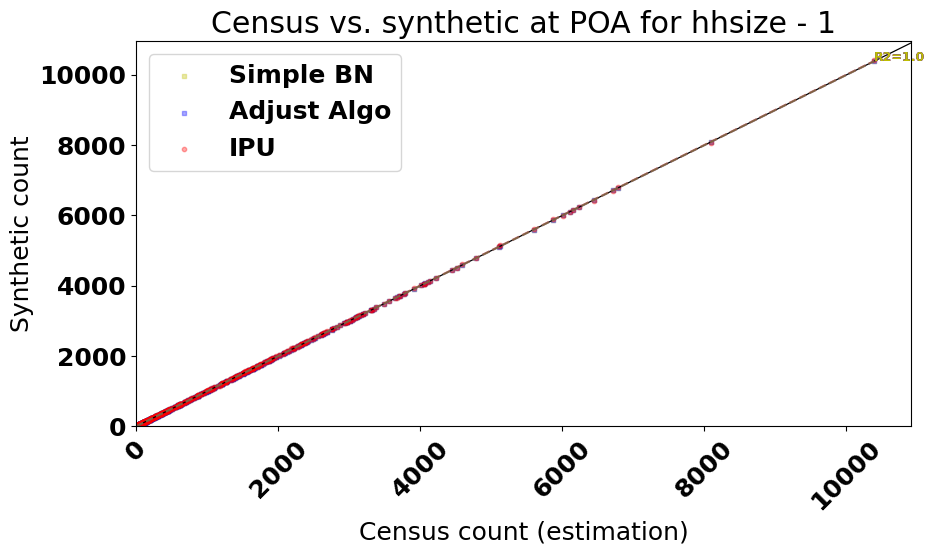

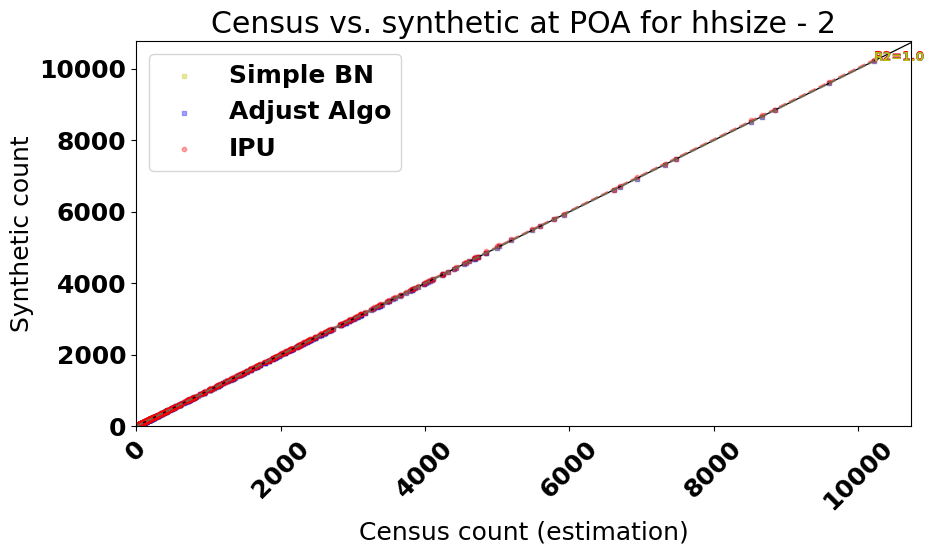

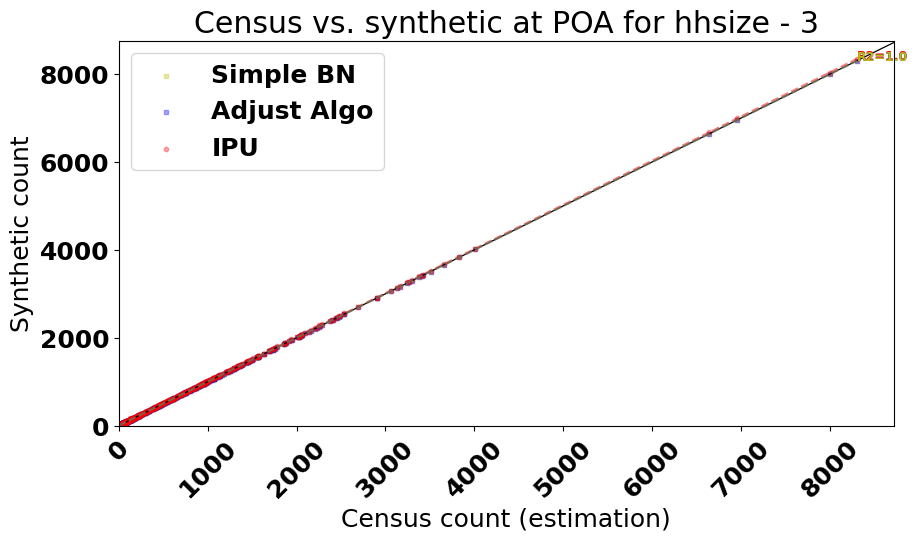

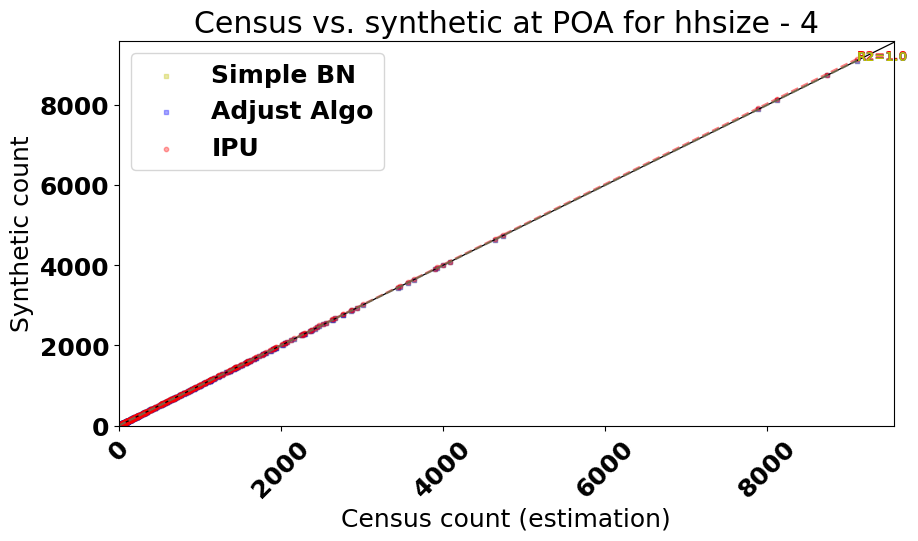

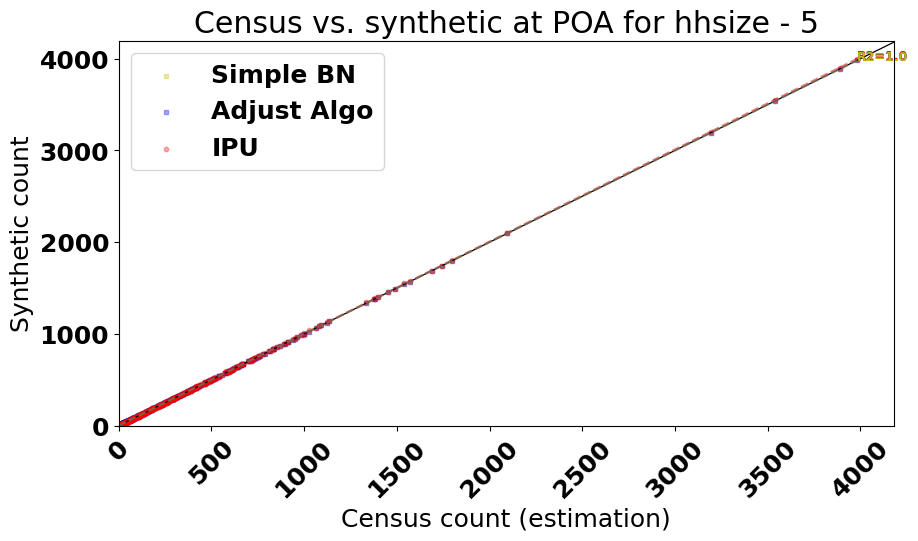

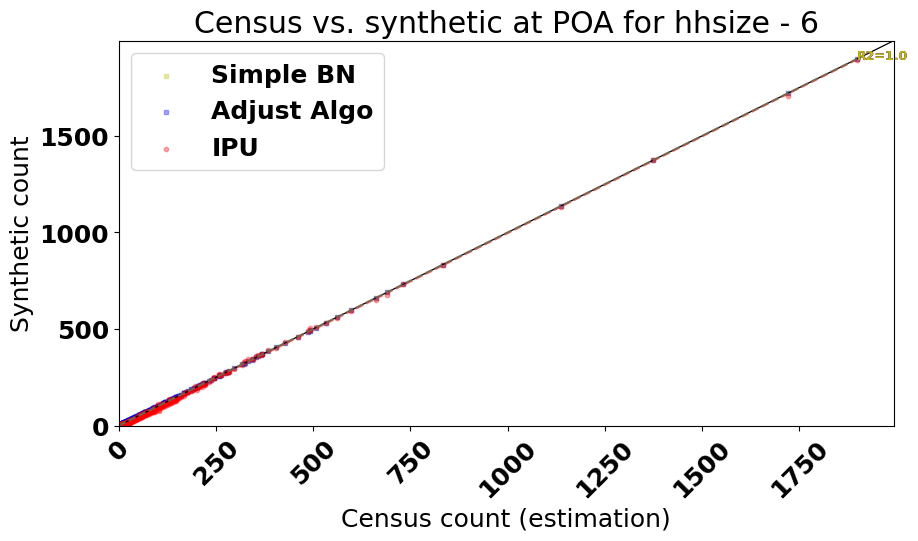

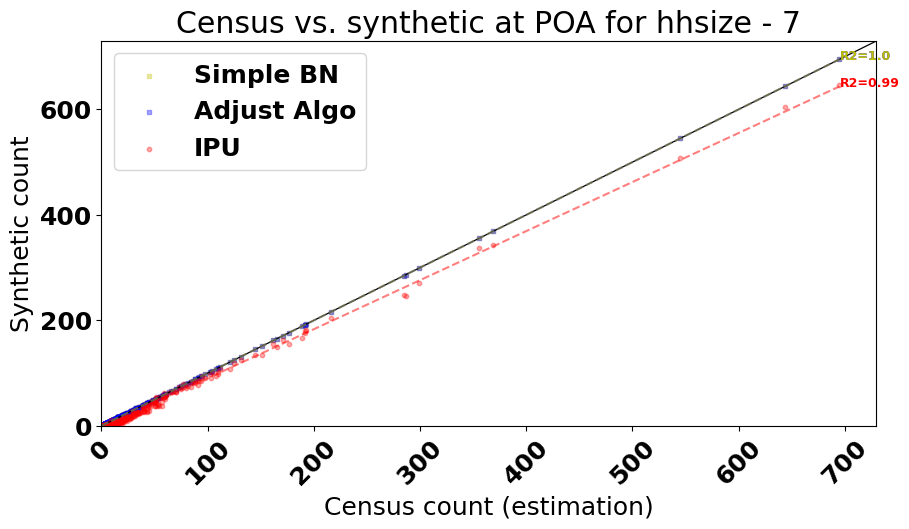

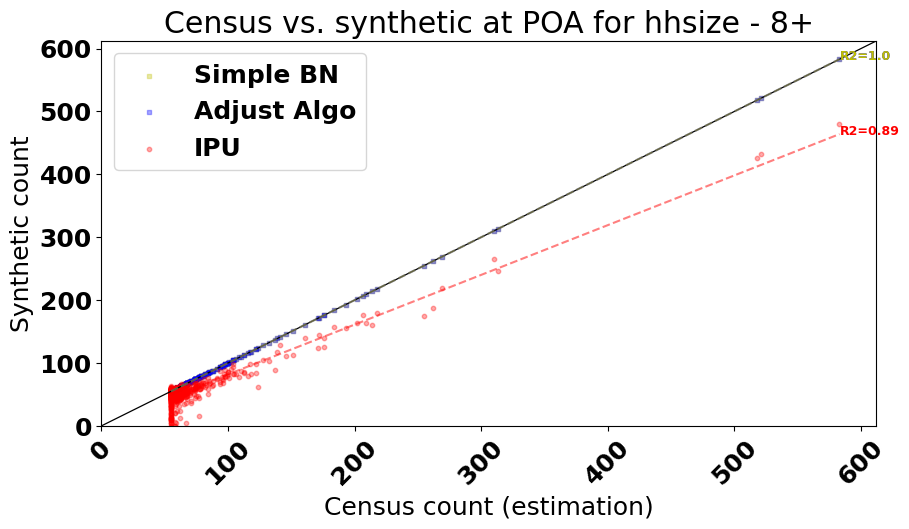

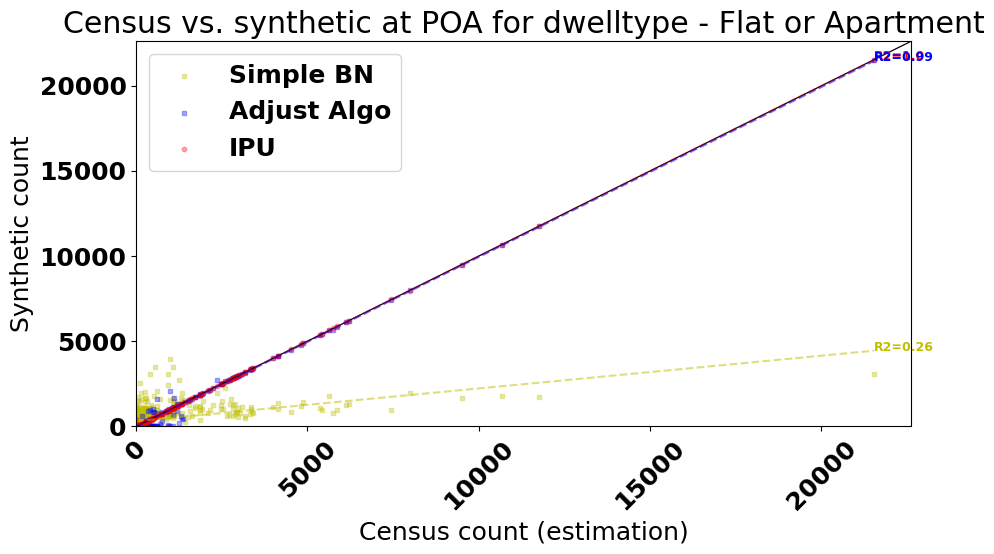

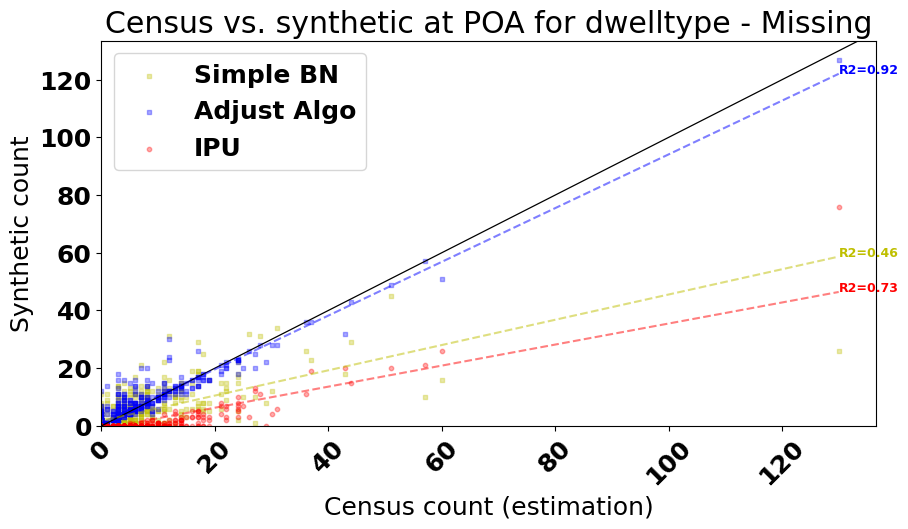

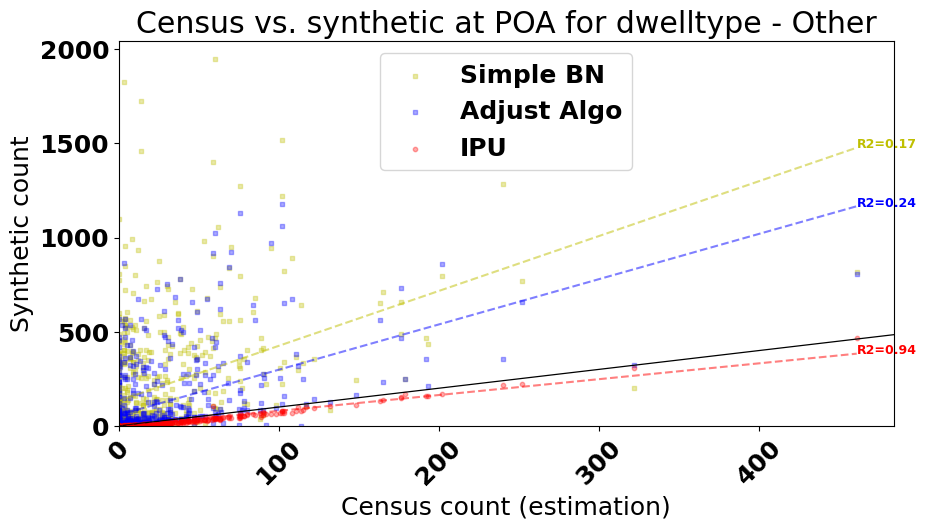

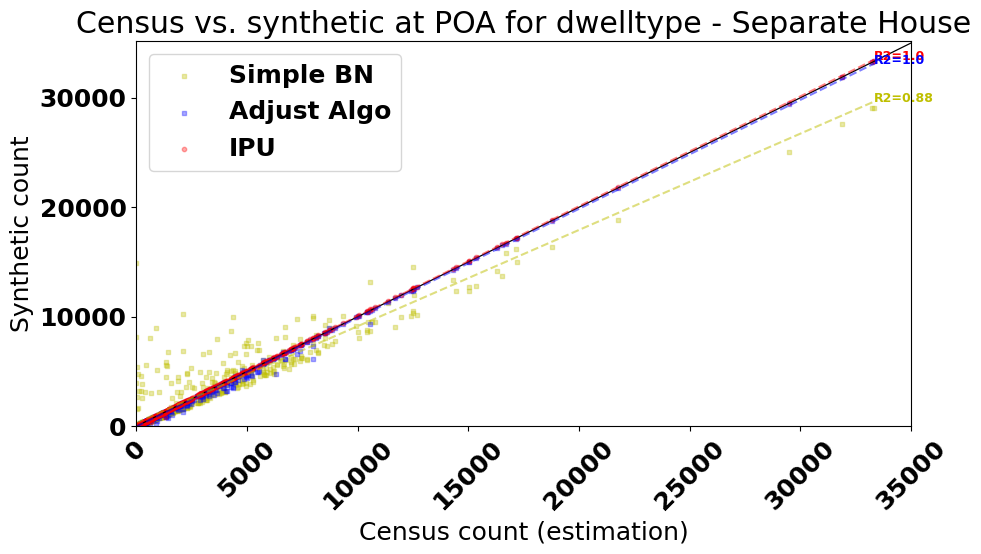

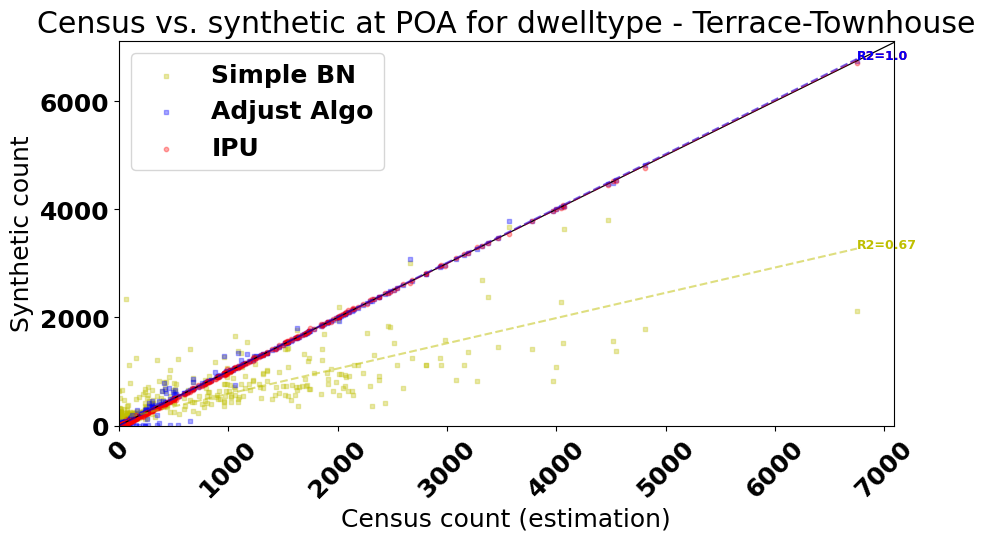

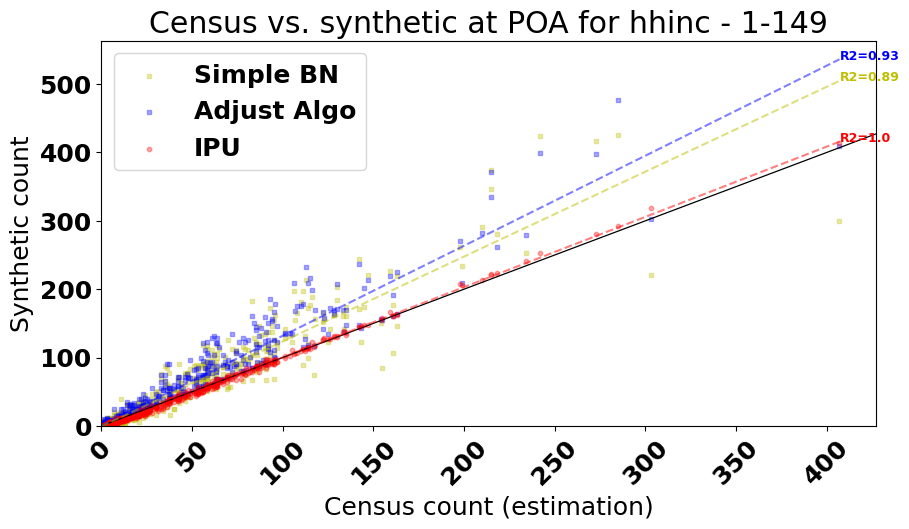

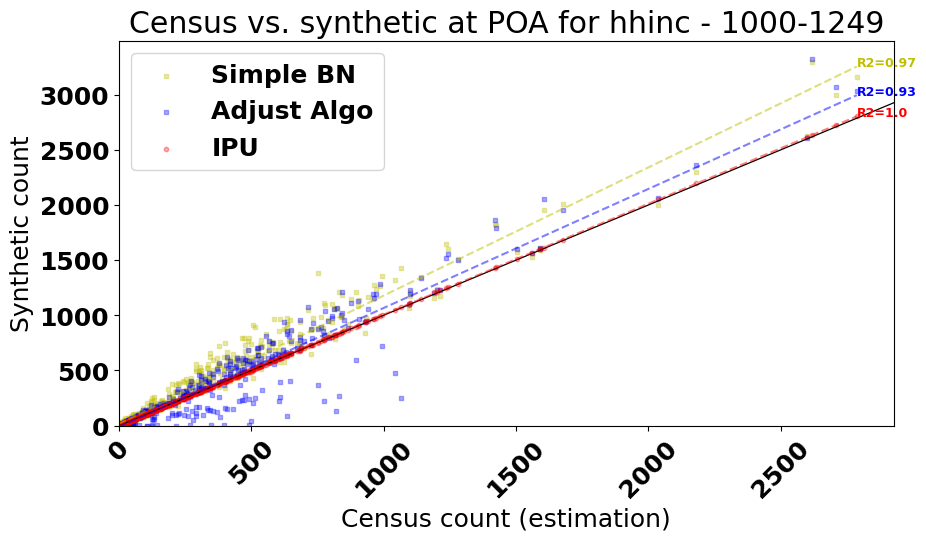

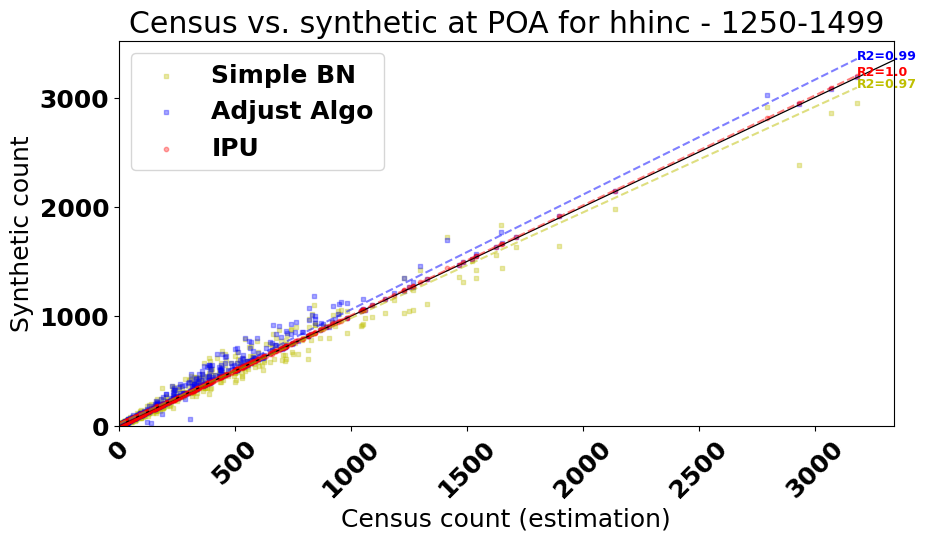

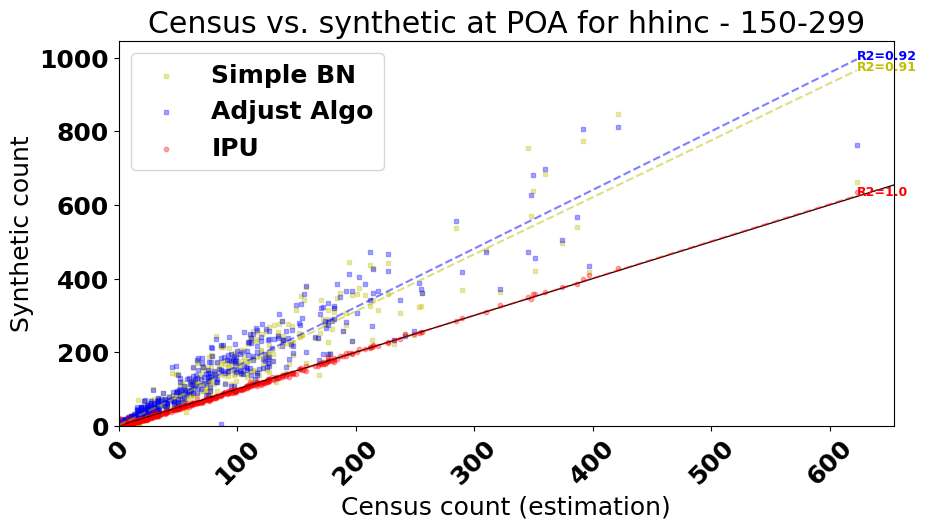

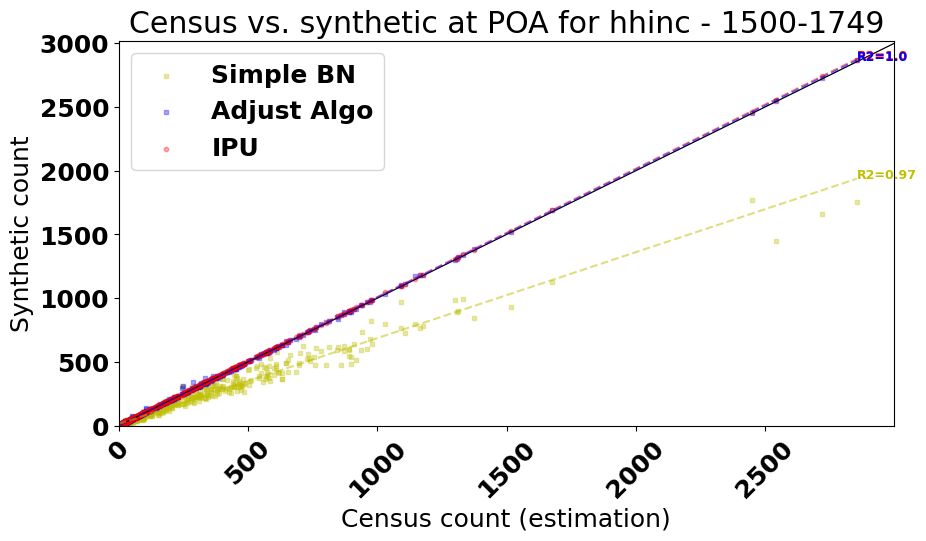

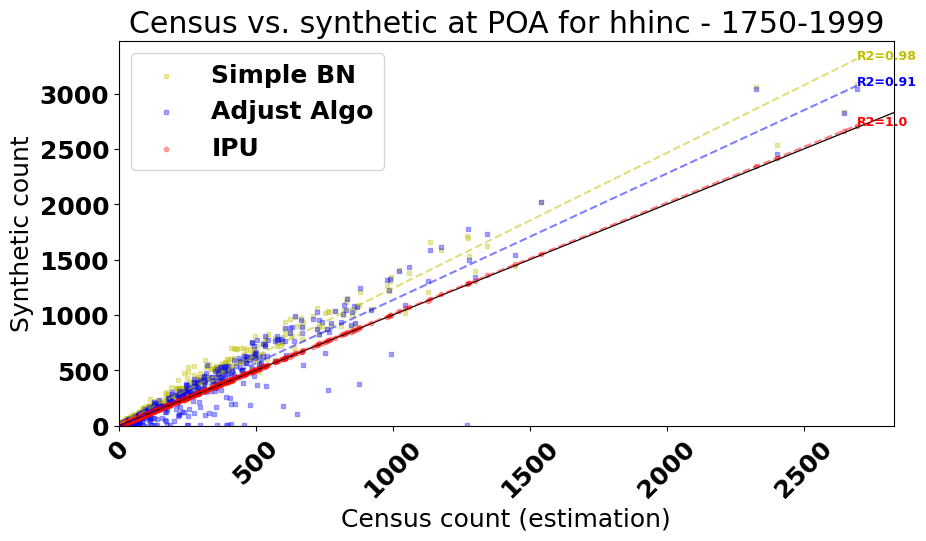

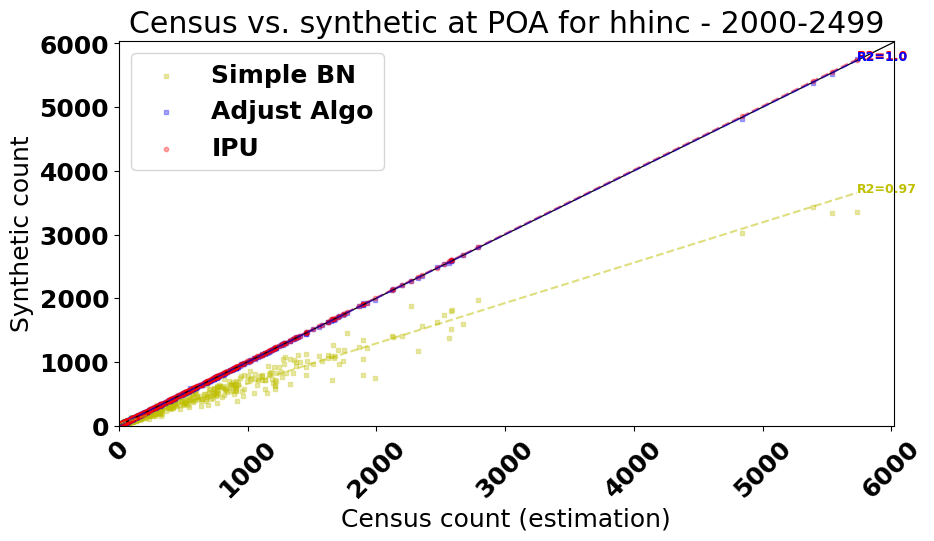

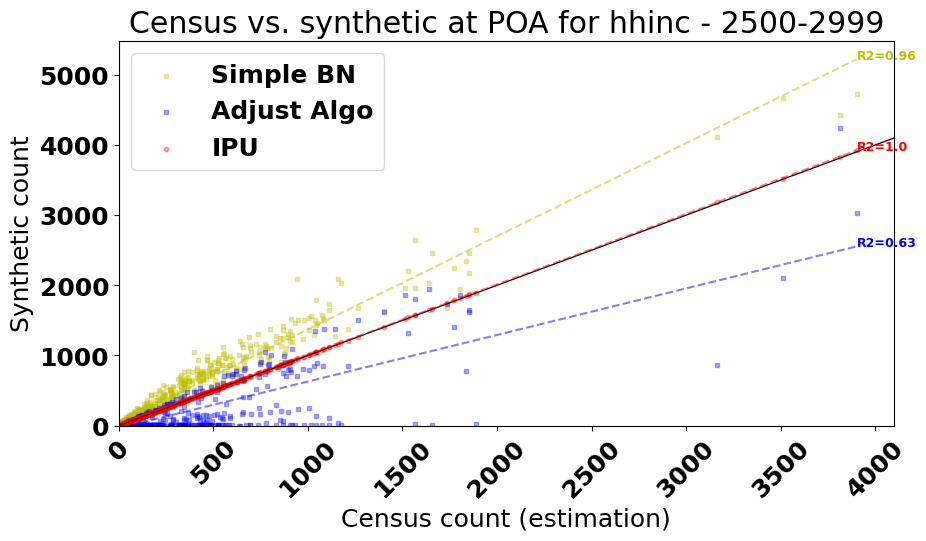

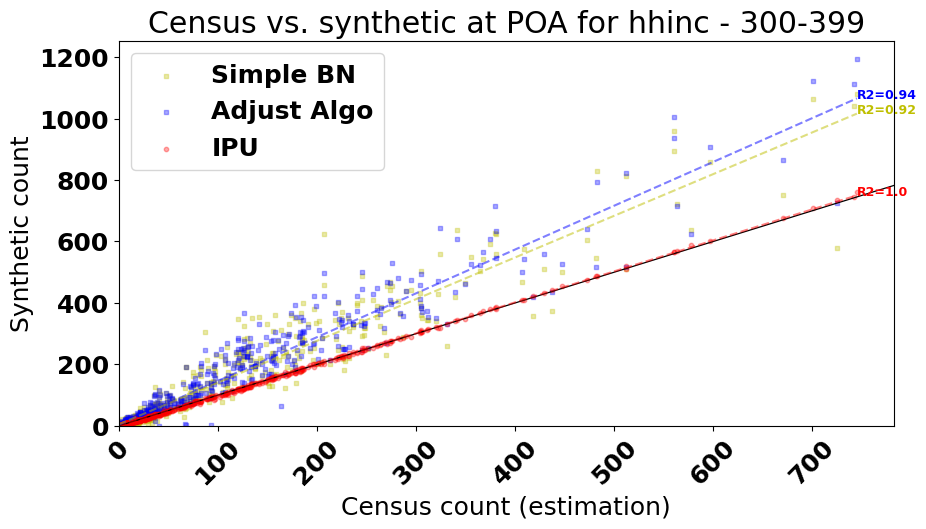

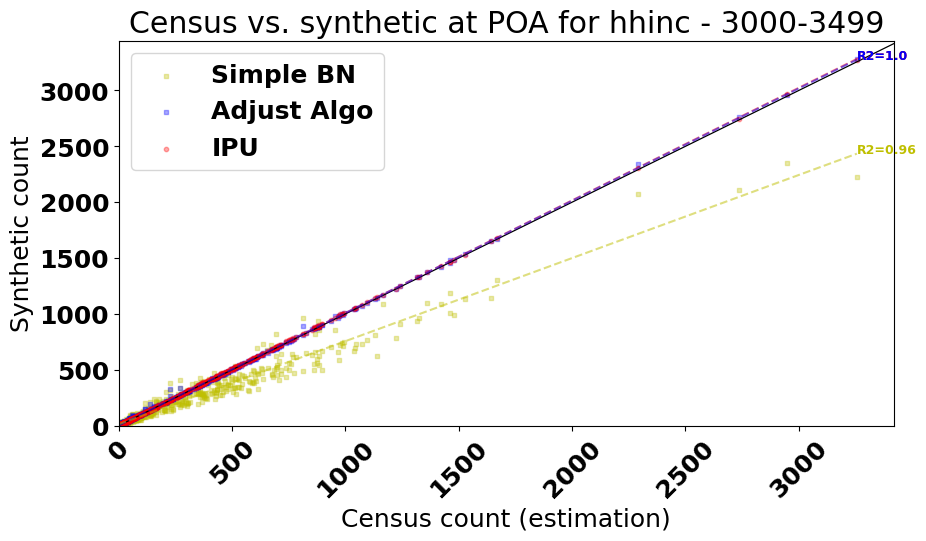

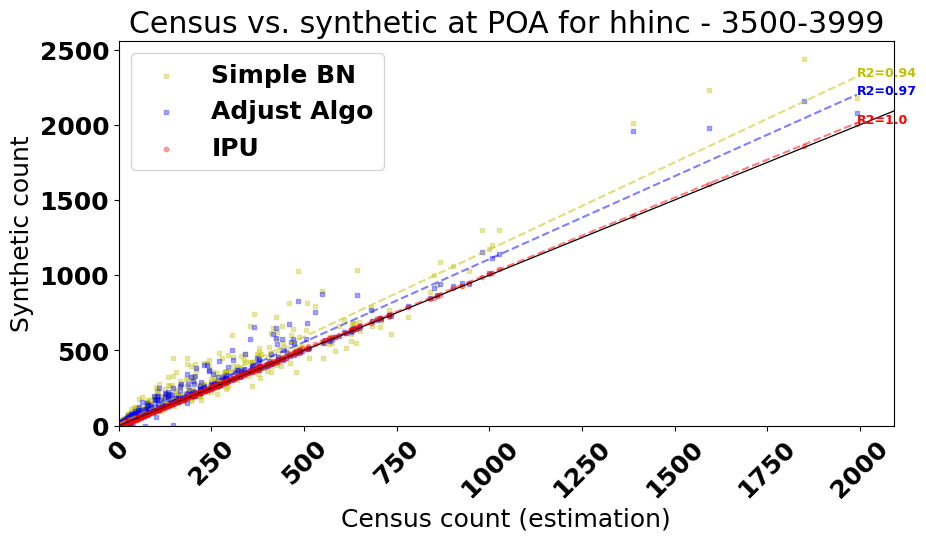

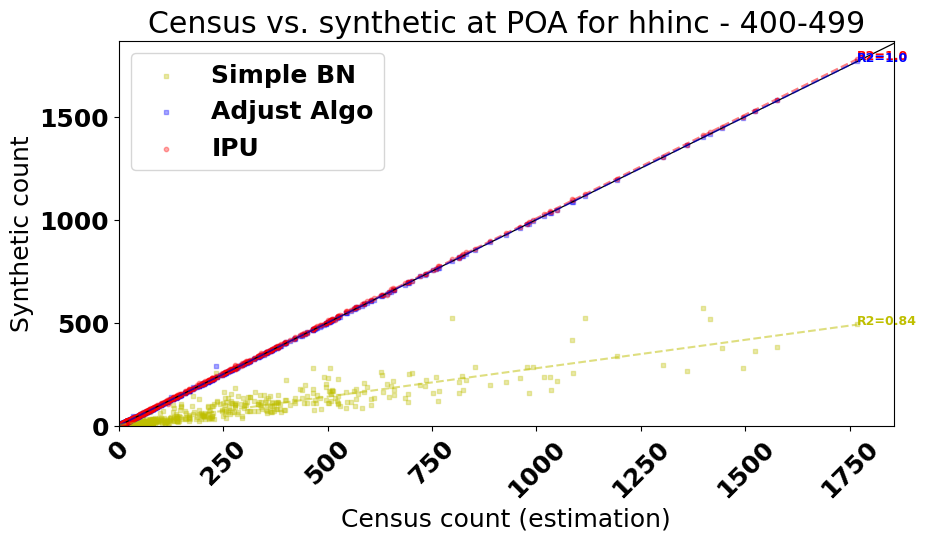

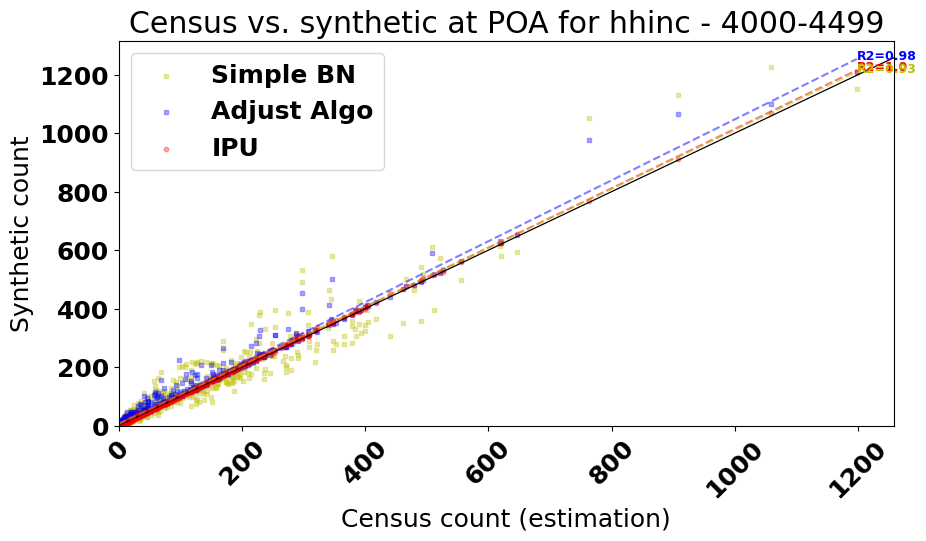

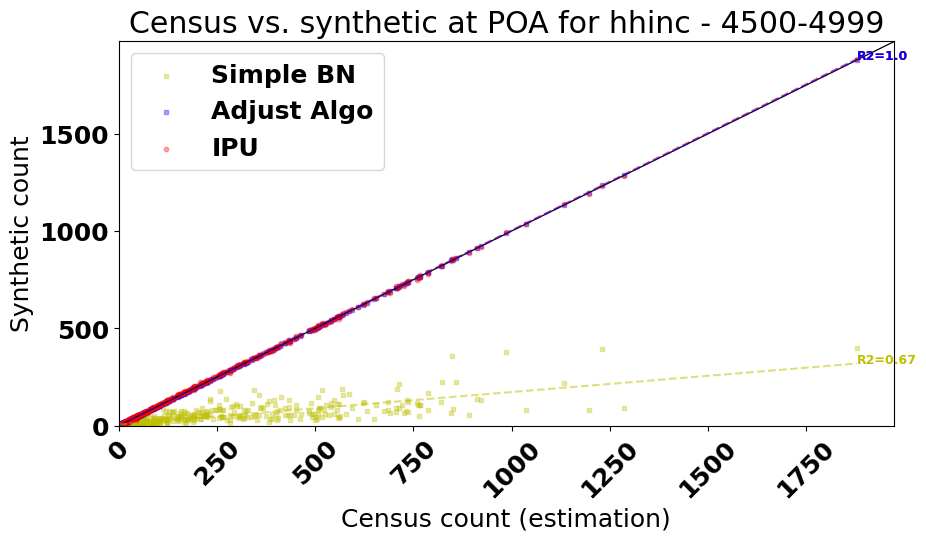

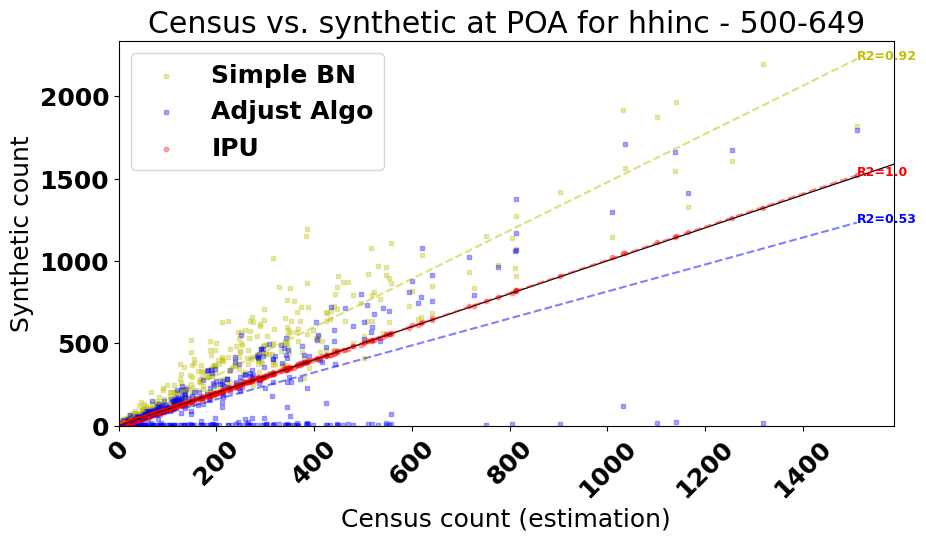

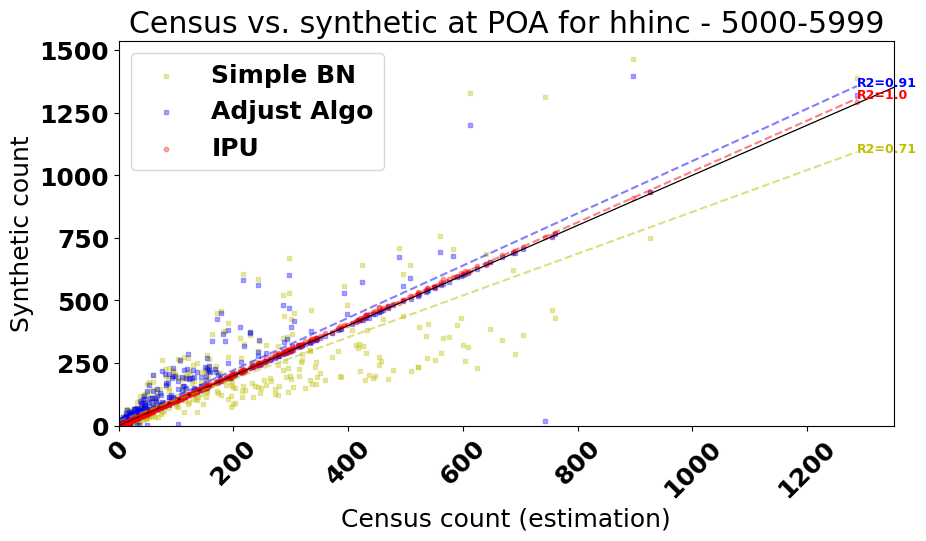

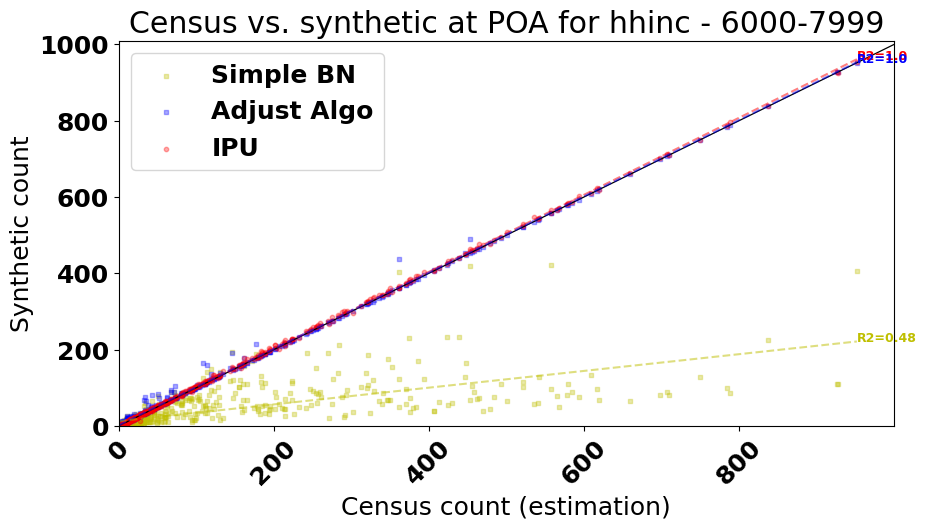

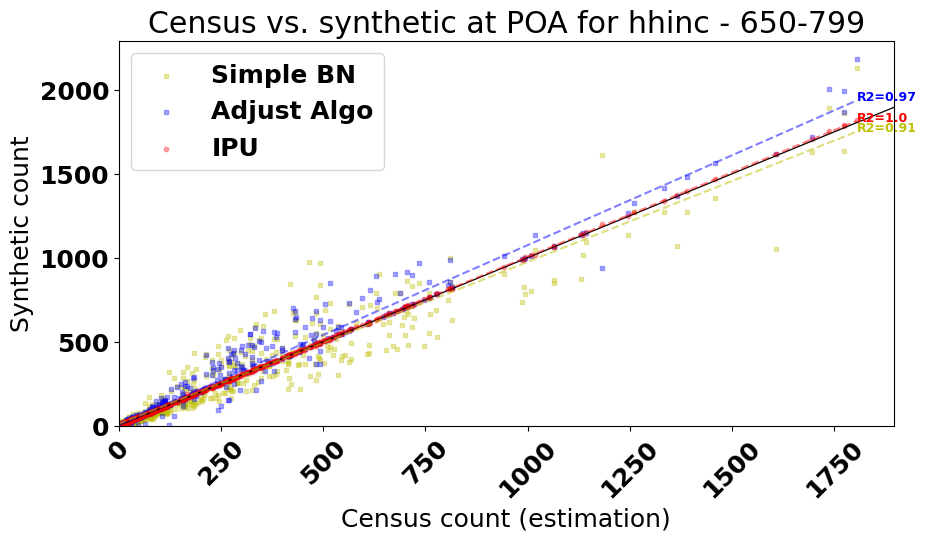

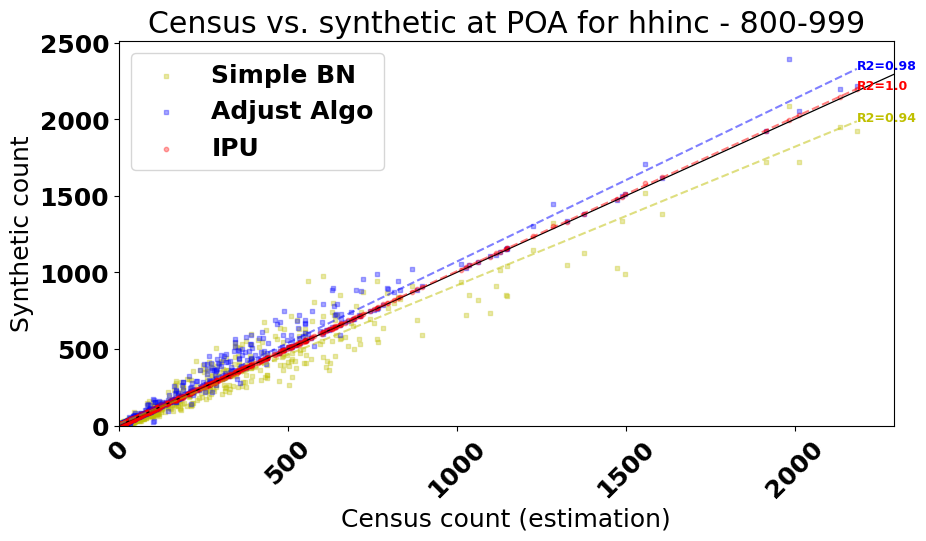

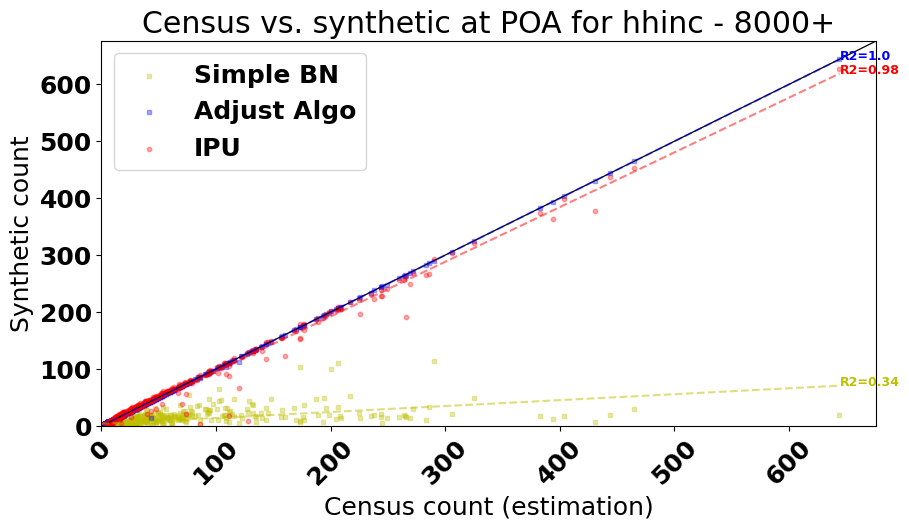

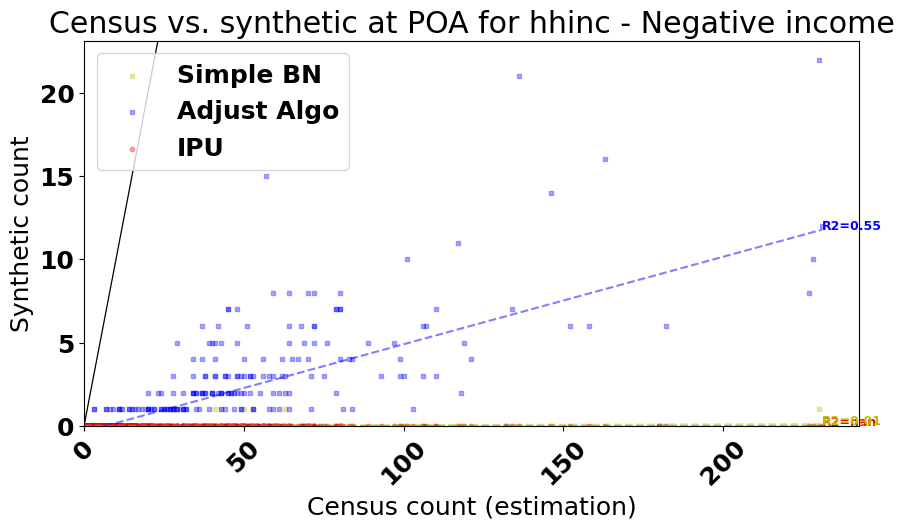

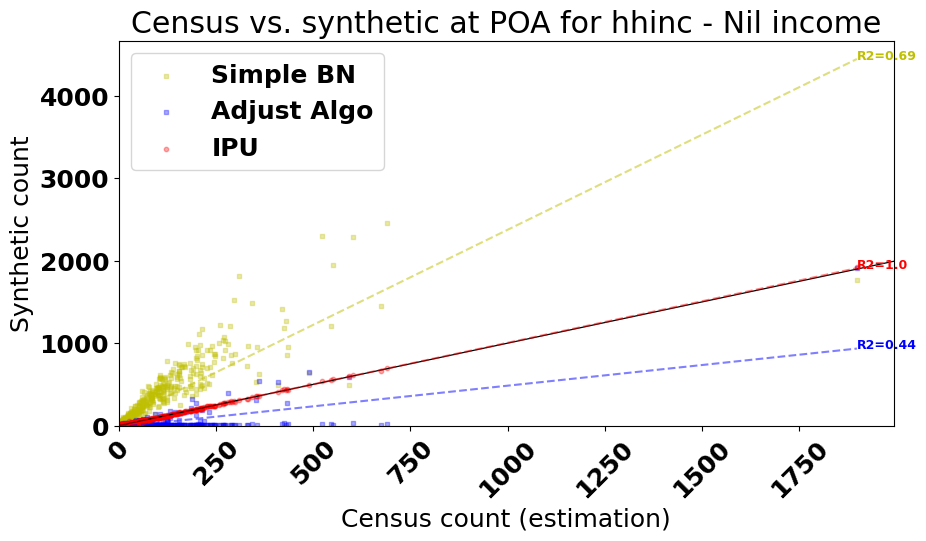

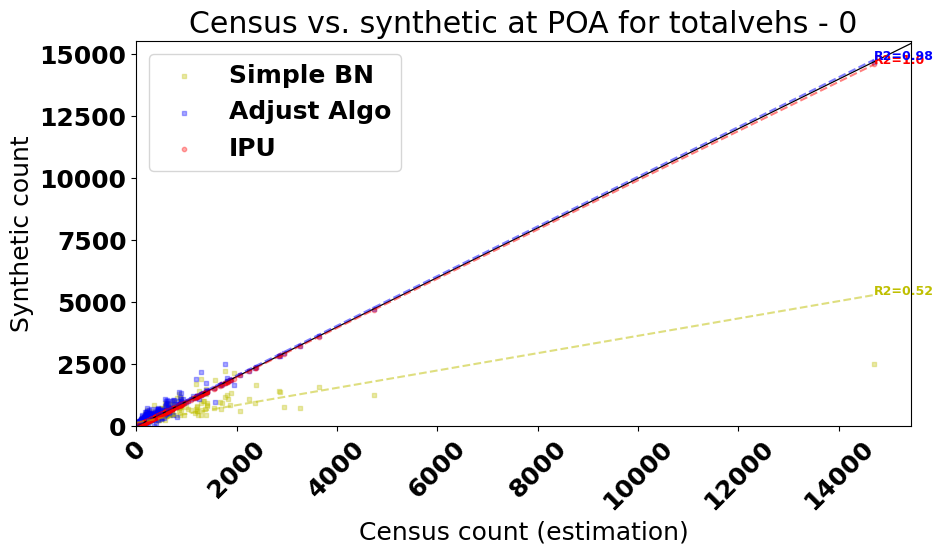

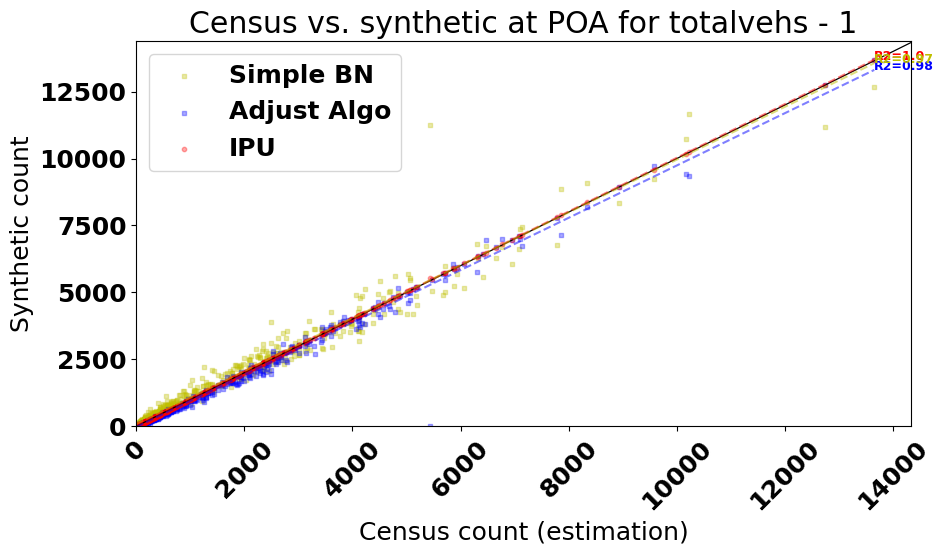

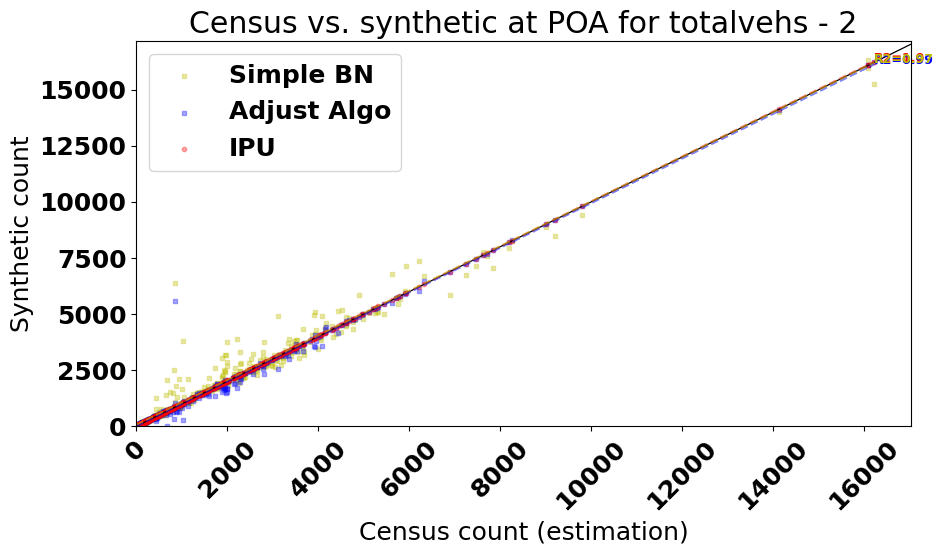

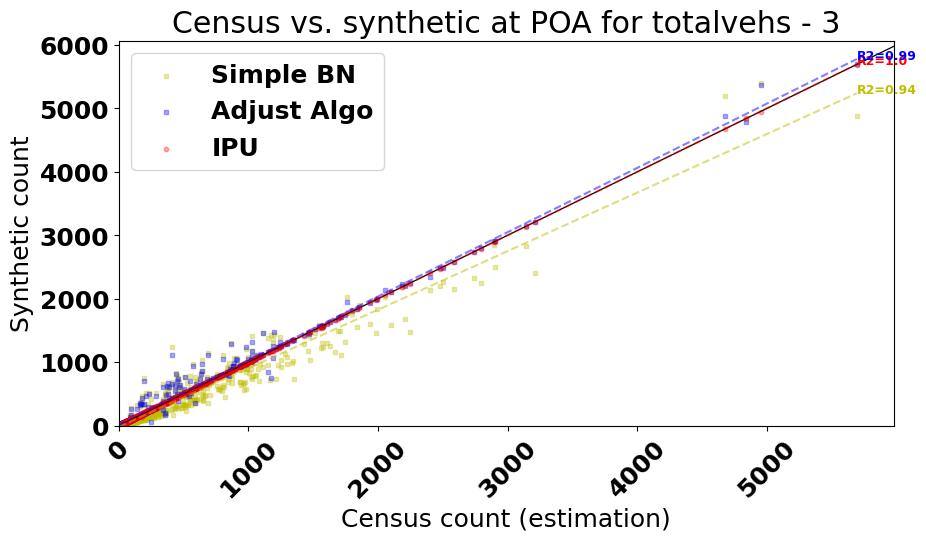

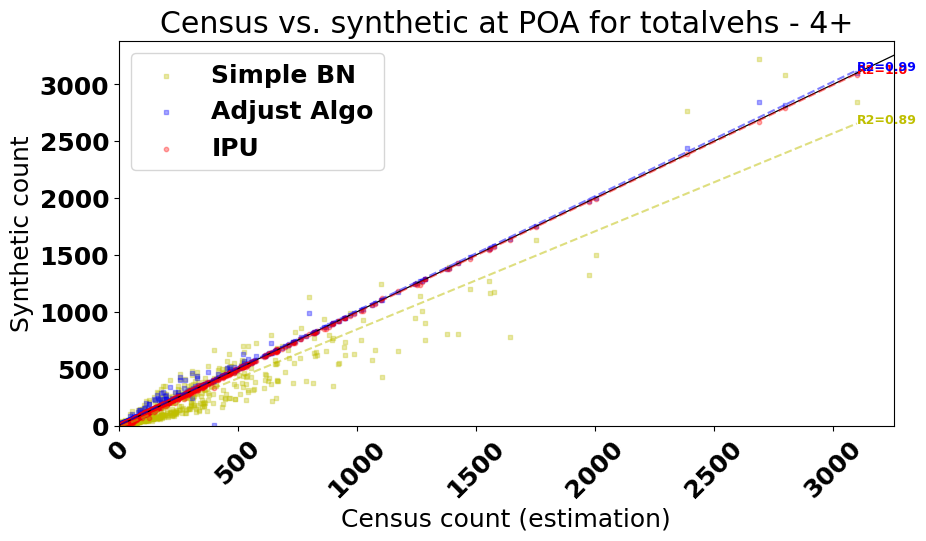

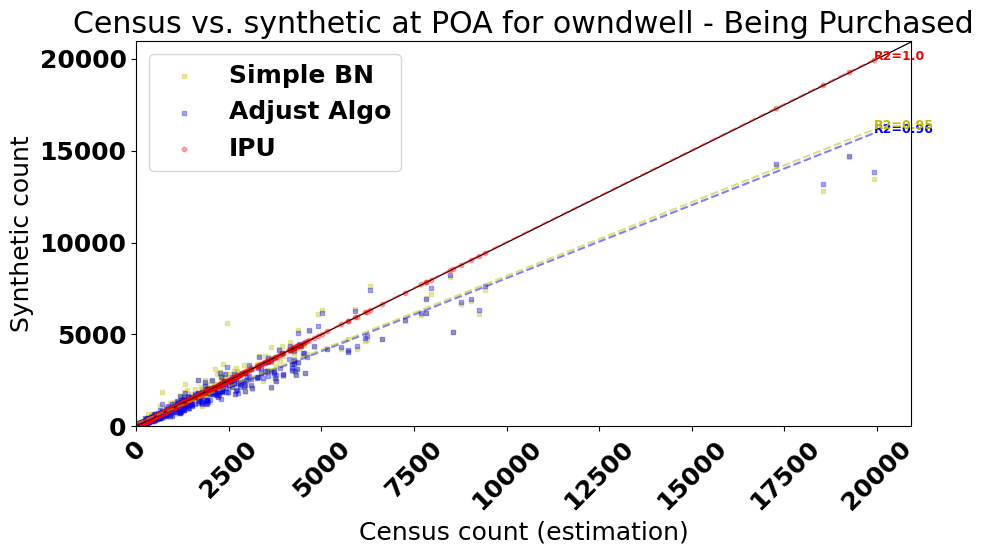

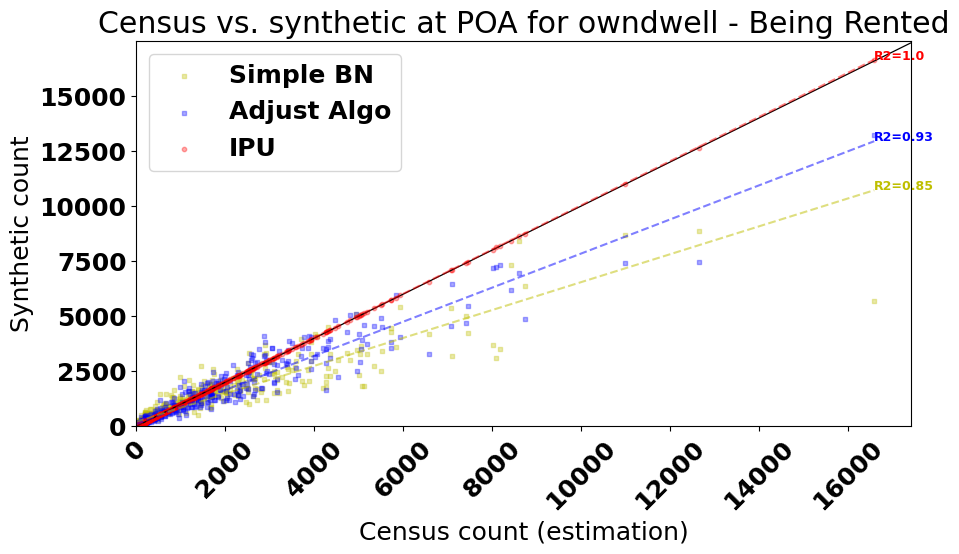

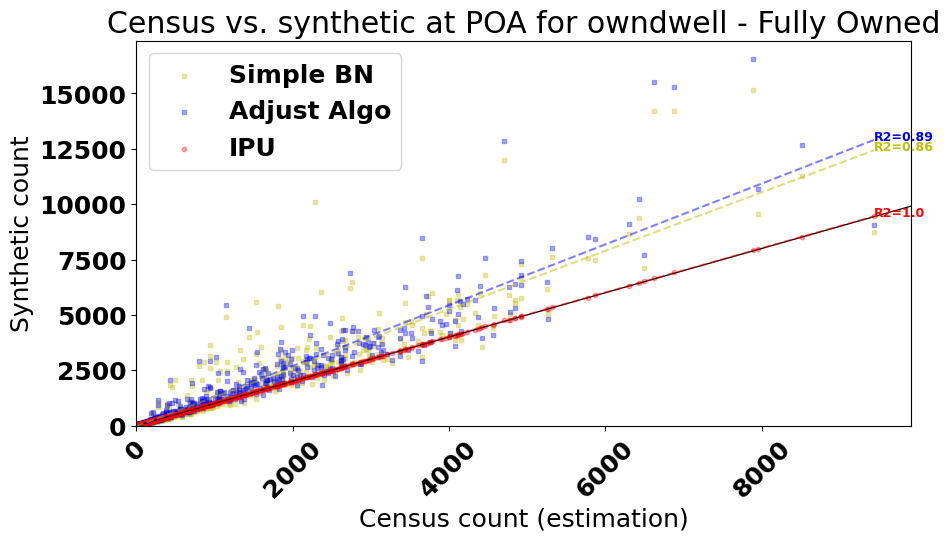

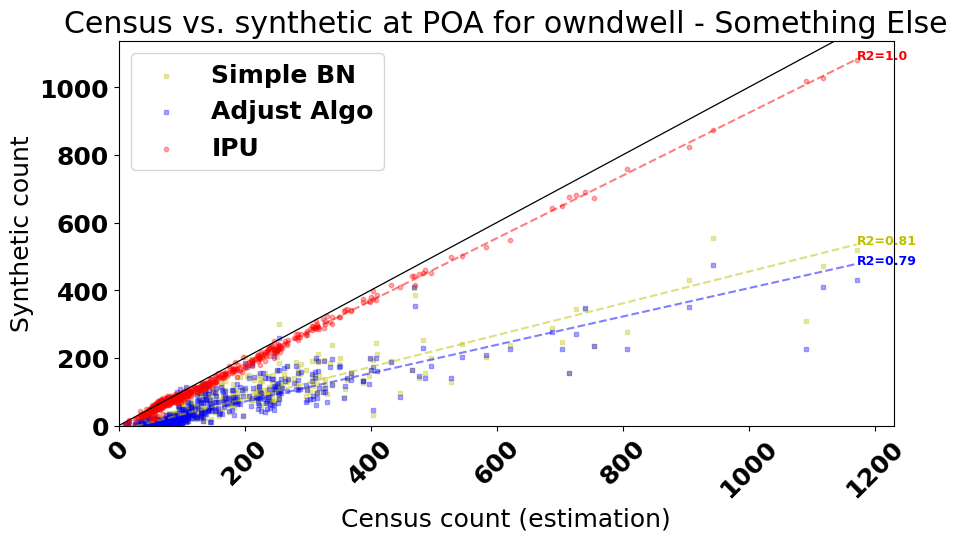

In [10]:
ls_atts = marg_hh.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    syn_check_bn = syn_hh_bn.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_noad = syn_hh_noad.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_hh_ipu.groupby(chosen_att)["geog"].value_counts()
    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
            if (val, poa) in syn_check_bn.index:
                to_plot[val][2].append(syn_check_bn[(val, poa)])
            else:
                to_plot[val][2].append(0)
            if (val, poa) in syn_check_noad.index:
                to_plot[val][3].append(syn_check_noad[(val, poa)])
            else:
                to_plot[val][3].append(0)


    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_bn = list(to_plot[val][2])
        y_noad = list(to_plot[val][3])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_noad, s=10, c='y', marker="s", label='Simple BN', alpha=0.33)
        ax1.scatter(x, y_bn, s=10, c='b', marker="s", label='Adjust Algo', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_bn = np.poly1d(np.polyfit(x[0], y_bn, 1))(np.unique(x[0]))
        y_best_fit_noad = np.poly1d(np.polyfit(x[0], y_noad, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_bn, c='b', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_noad, c='y', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_bn = r_squared(x[0], y_bn, 1)["determination"]
        r_s_noad = r_squared(x[0], y_noad, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_bn), f"R2={round(r_s_bn, 2)}", size=9, c="b")
        ax1.text(max(x[0]), max(y_best_fit_noad), f"R2={round(r_s_noad, 2)}", size=9, c="y")
        
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        # plt.show()
        plt.savefig(f'./output/imgs/{chosen_att}_{val}_census_compa.png')

In [11]:
# dict_id_poa = dict(zip(syn_hh_bn["hhid"], syn_hh_bn["POA"]))
# syn_pp_bn["POA"] = syn_pp_bn.apply(lambda r: dict_id_poa[r["hhid"]], axis=1)

dict_id_poa_no = dict(zip(syn_hh_noad["hhid"], syn_hh_noad["POA"]))
syn_pp_noad["POA"] = syn_pp_noad.apply(lambda r: dict_id_poa_no[r["hhid"]], axis=1)

In [12]:
syn_pp_noad

hhid    age sex          persinc     nolicence anywork   POA  \
0              0  70-79   F    $400-599 p.w.    No Licence       N  3000   
1              1  50-59   F    $200-299 p.w.  Some Licence       Y  3000   
2              2  60-69   M    $300-399 p.w.  Some Licence       N  3000   
3              3  20-29   M    $800-999 p.w.  Some Licence       Y  3000   
4              4  50-59   F  $1000-1249 p.w.  Some Licence       Y  3000   
...          ...    ...  ..              ...           ...     ...   ...   
6425654  2420346  50-59   F    $800-999 p.w.  Some Licence       Y  3576   
6425655  2420346  20-29   F    $200-299 p.w.  Some Licence       N  3576   
6425656  2420346  20-29   F  $1000-1249 p.w.  Some Licence       Y  3576   
6425657  2420311  30-39   F    $600-799 p.w.  Some Licence       Y  3192   
6425658  2420230  60-69   M    $800-999 p.w.  Some Licence       Y  3199   

        relationship  
0               Main  
1               Main  
2               Main  
3               Main  
4               Main  
...              ...  
6425654       Others  
6425655       Others  
6425656       Others  
6425657       Others  
6425658       Others  

[6425659 rows x 8 columns]

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_2876\2050625285.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


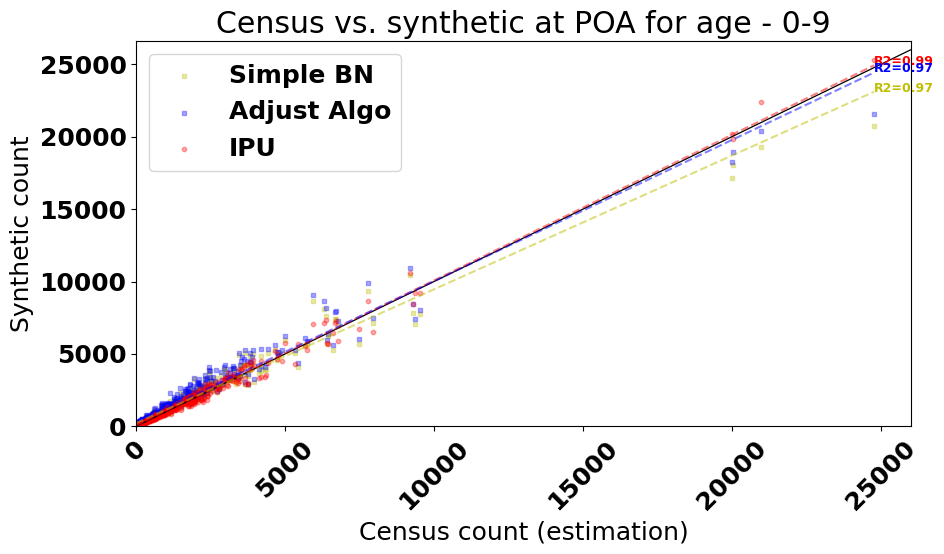

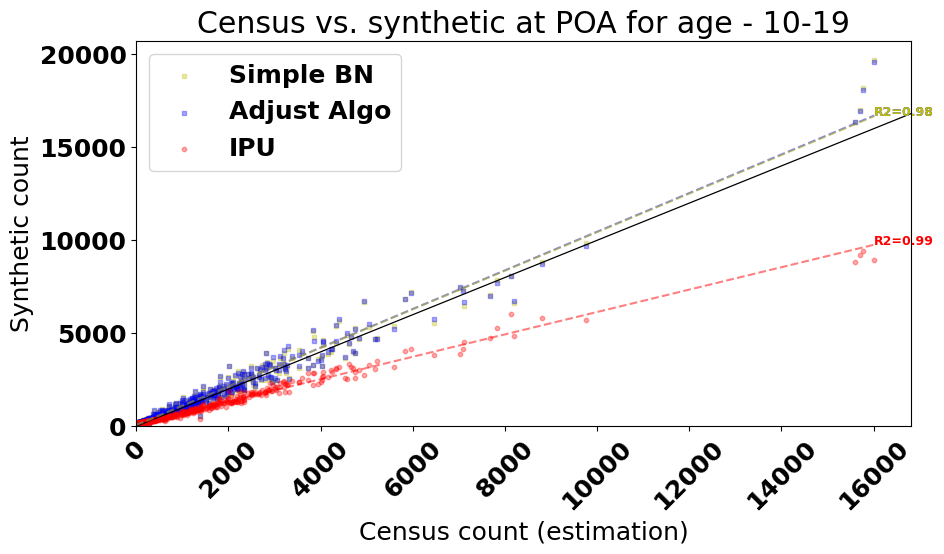

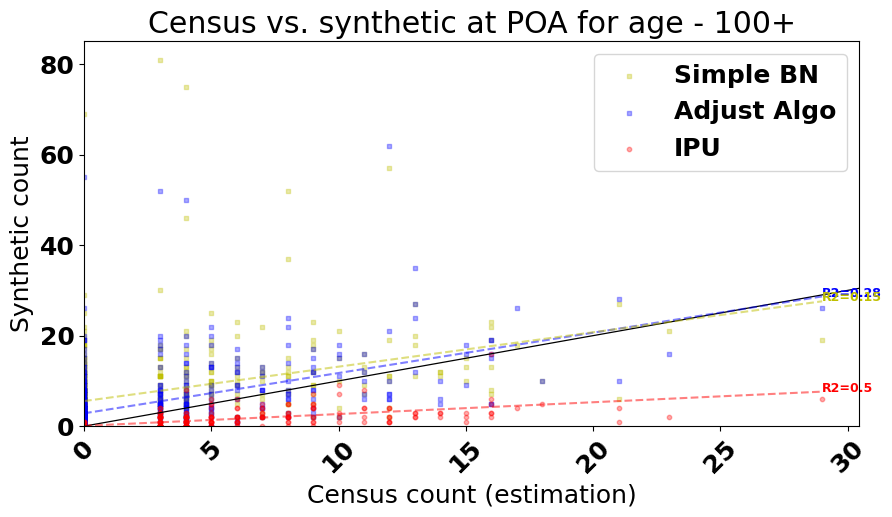

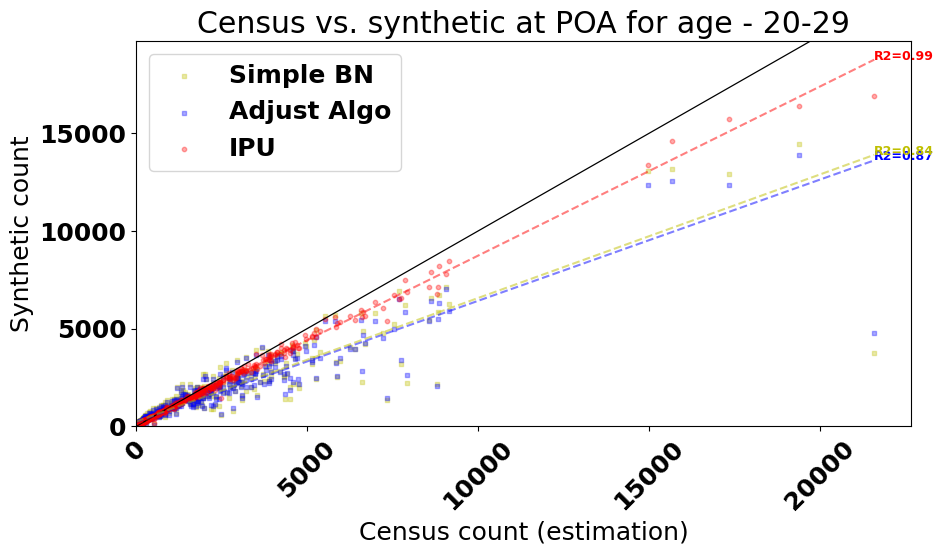

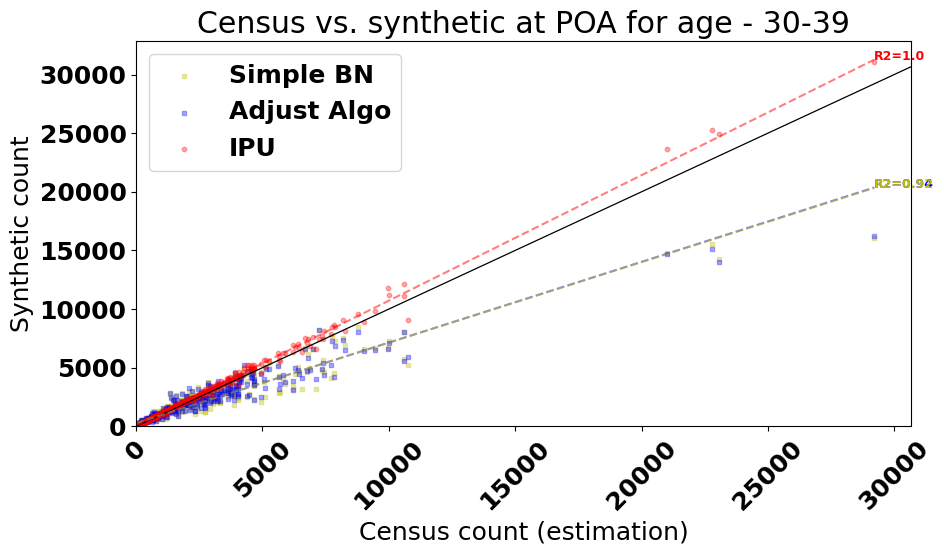

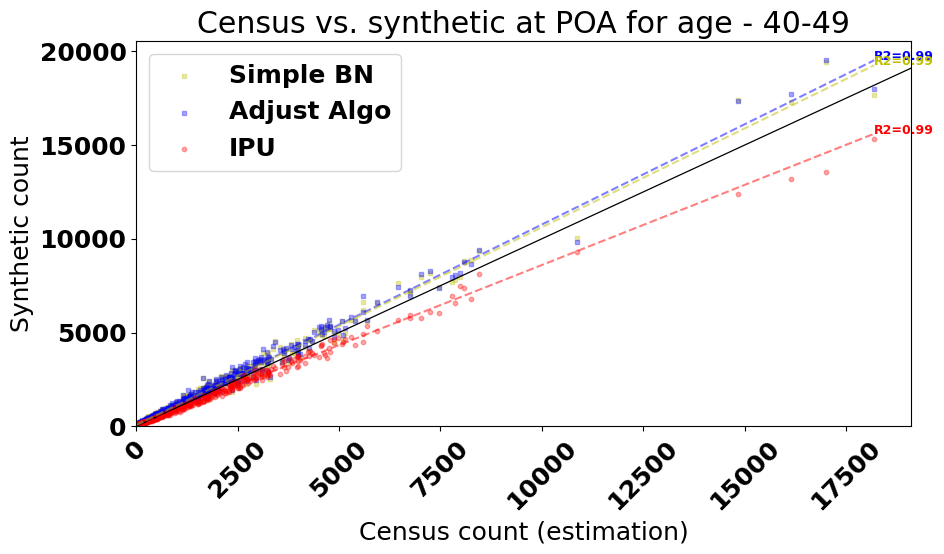

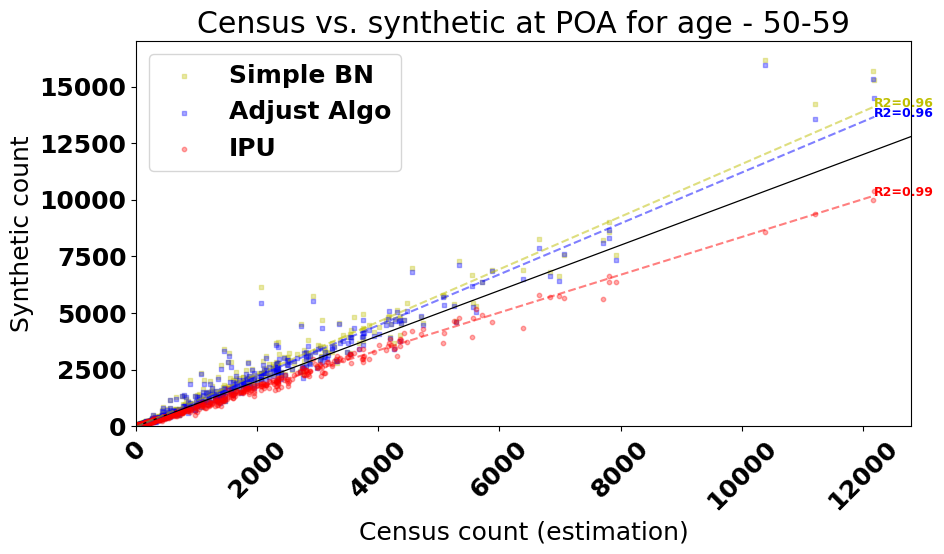

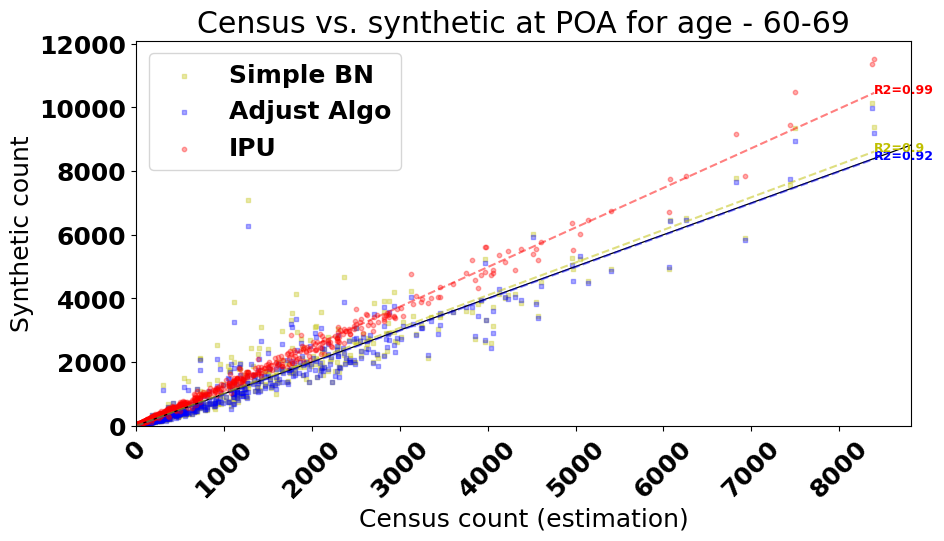

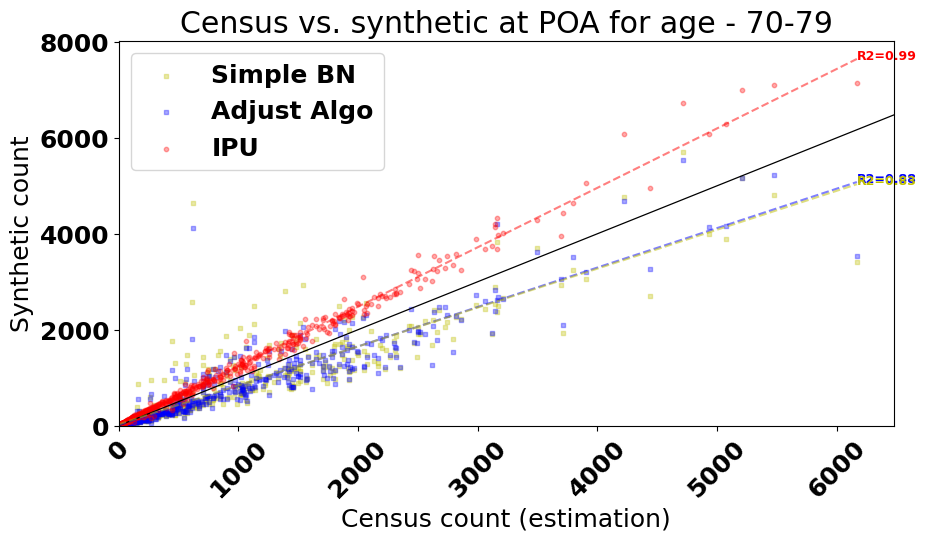

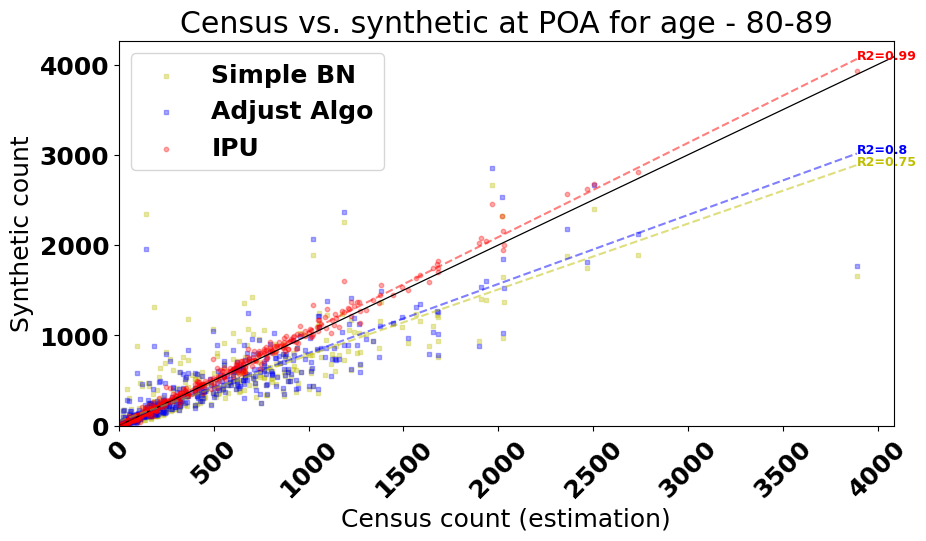

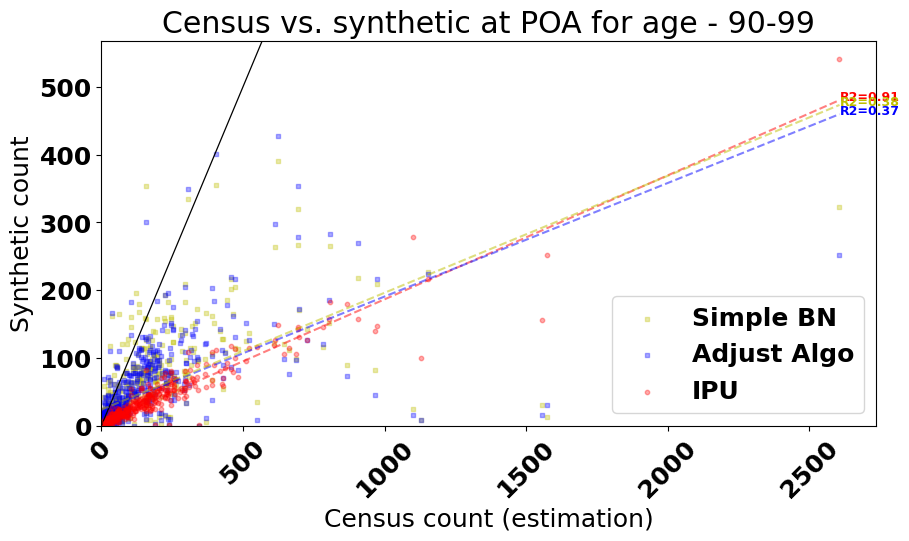

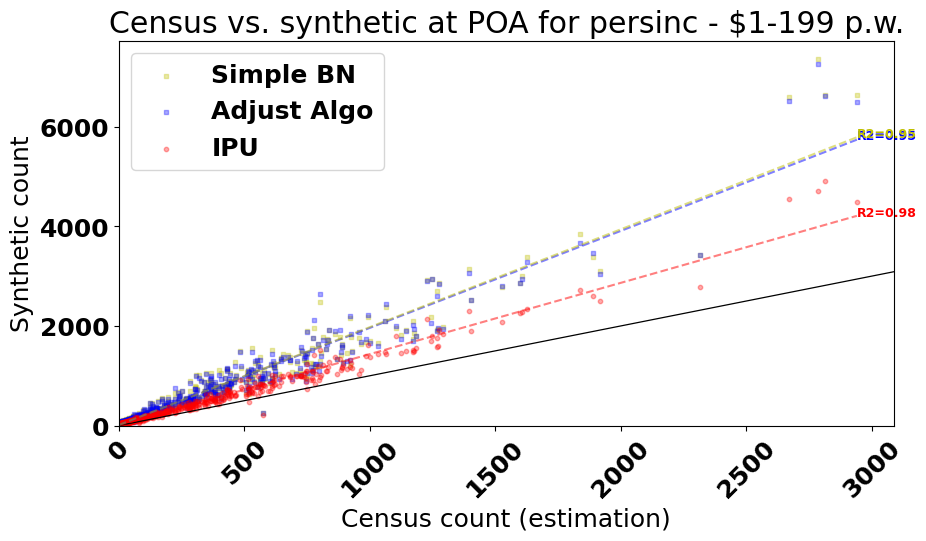

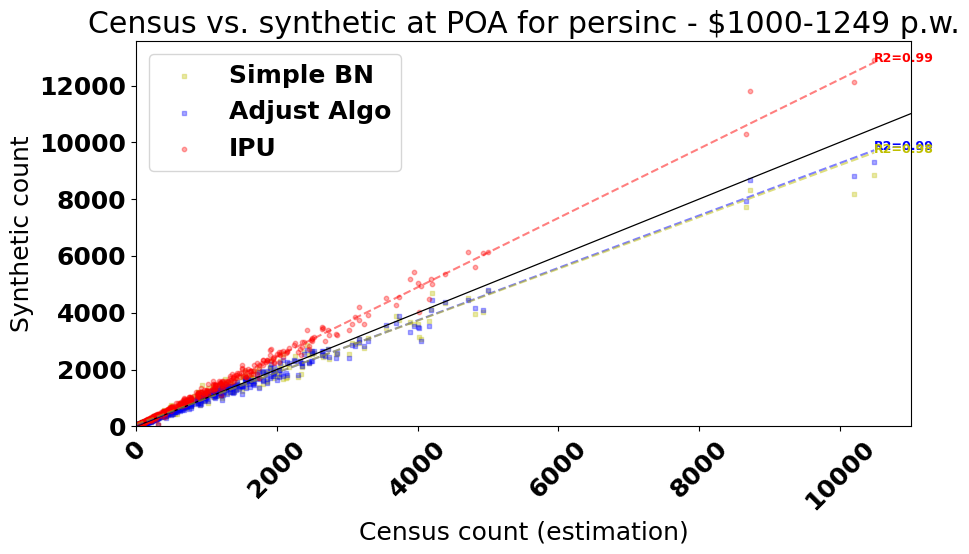

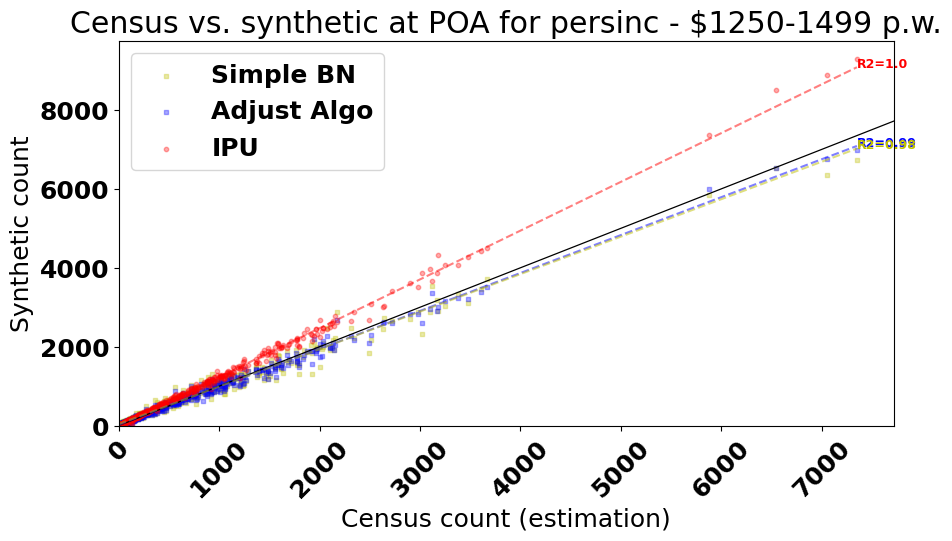

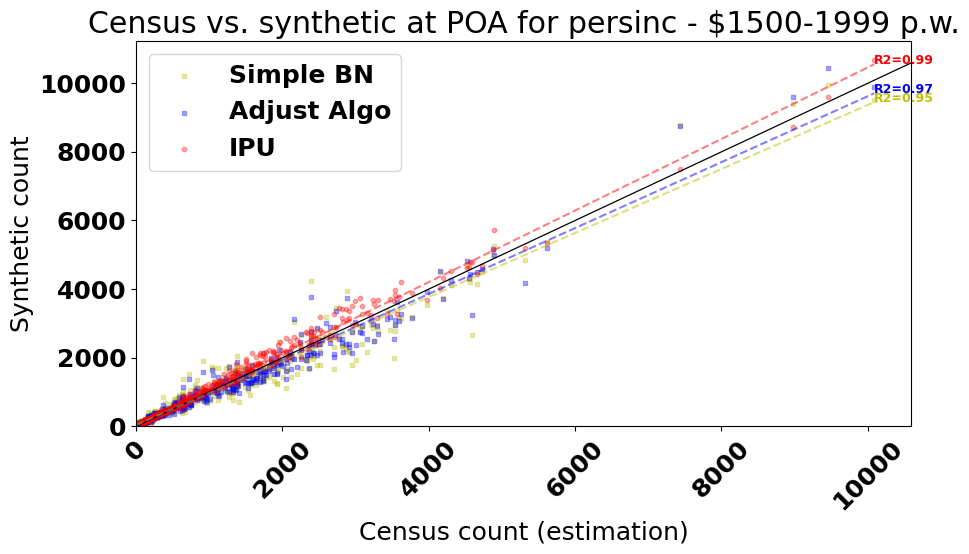

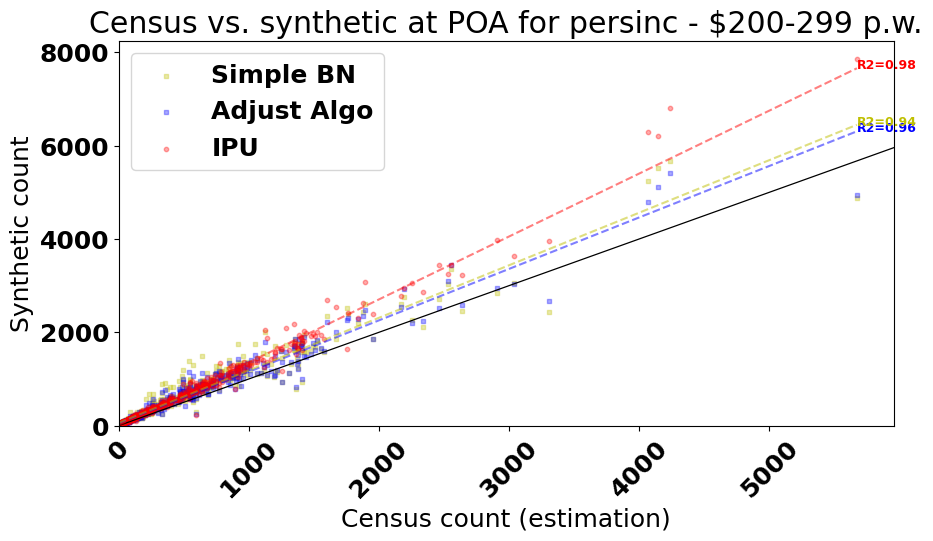

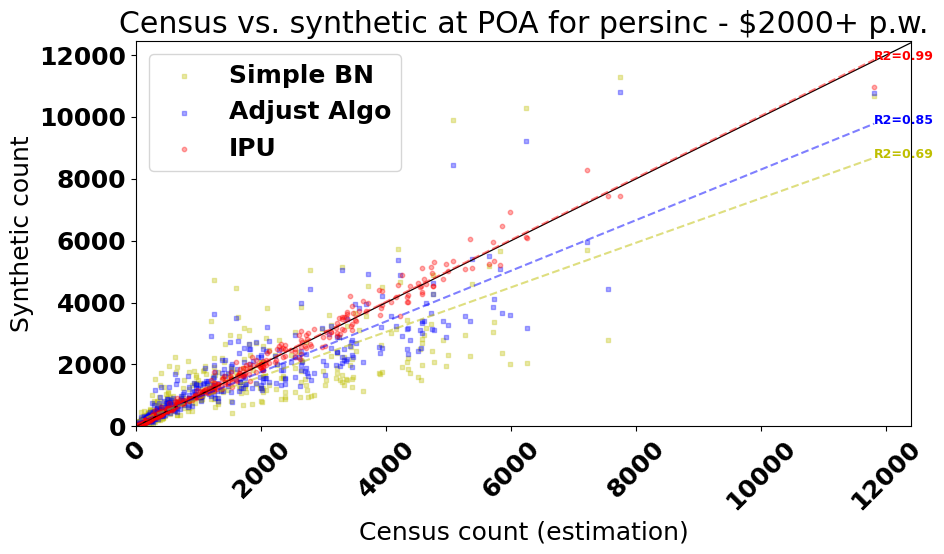

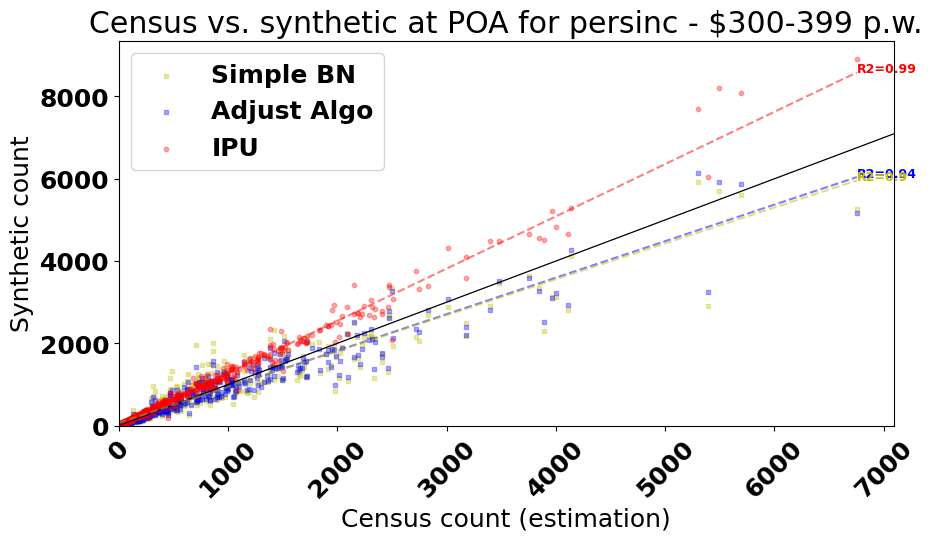

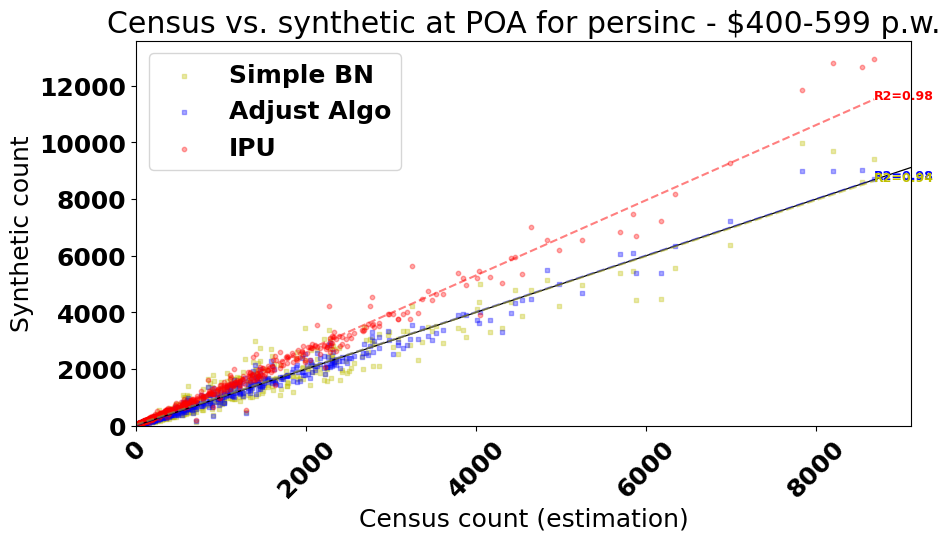

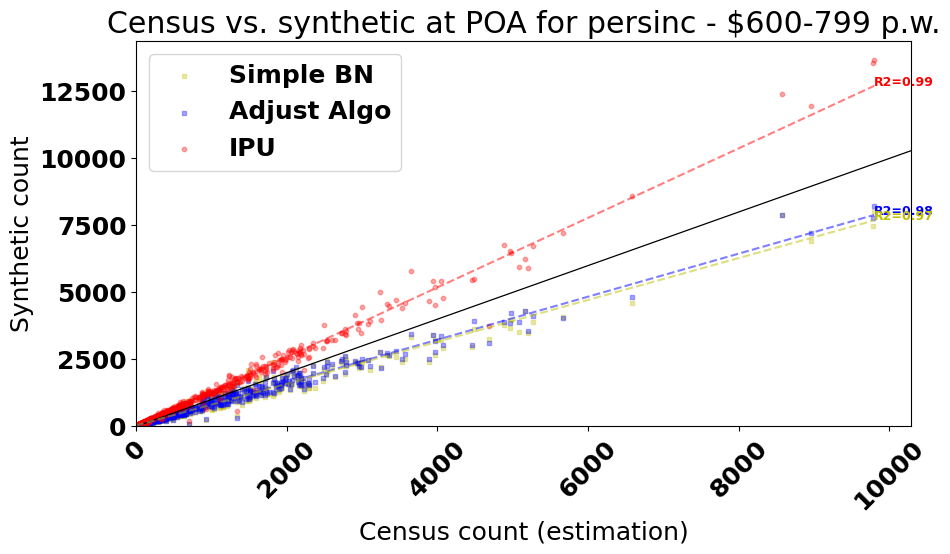

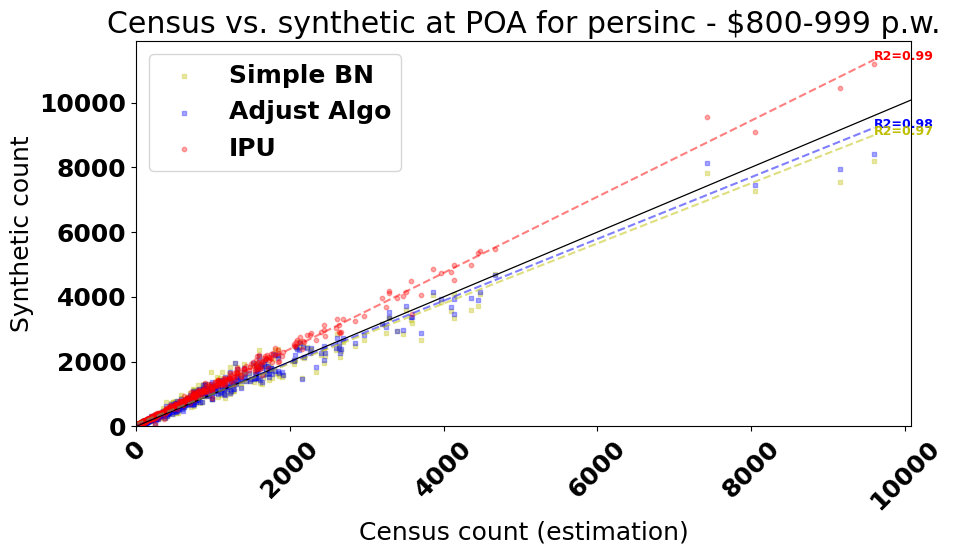

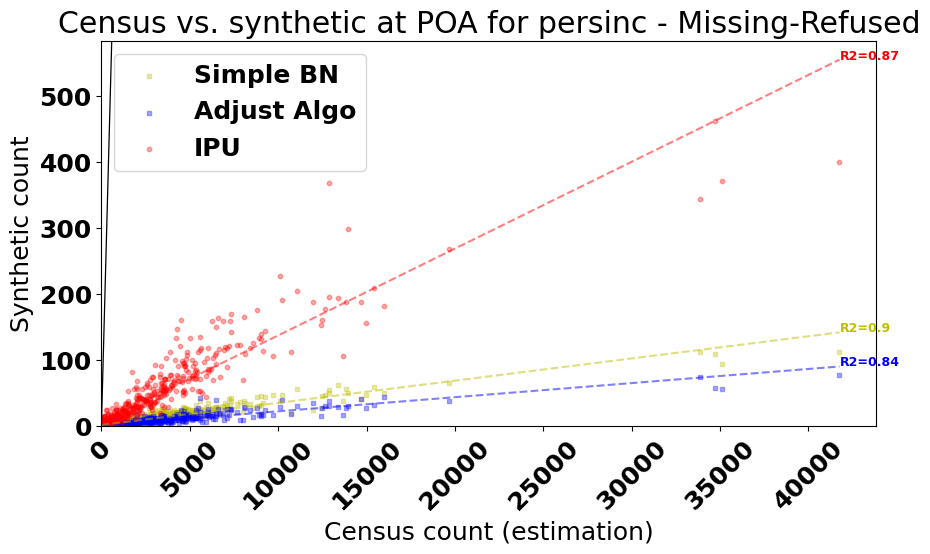

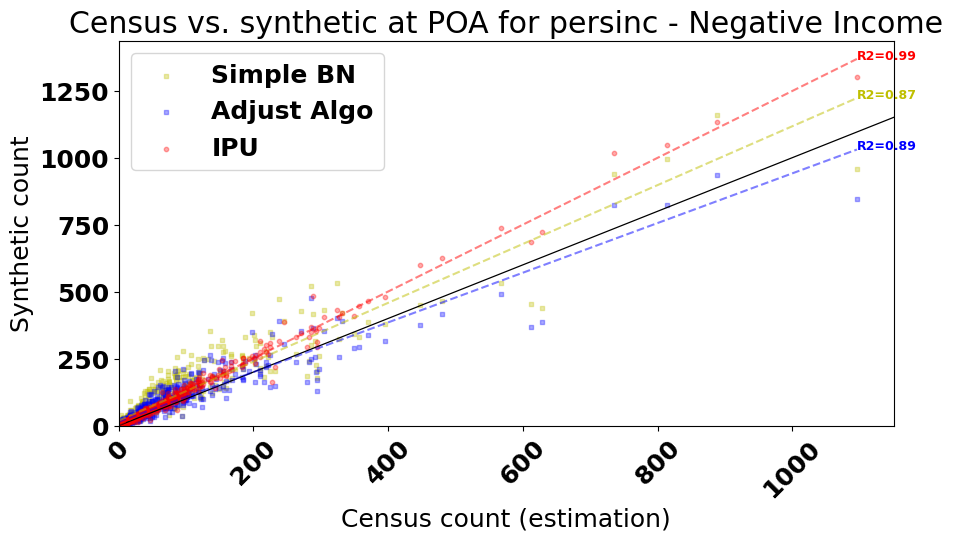

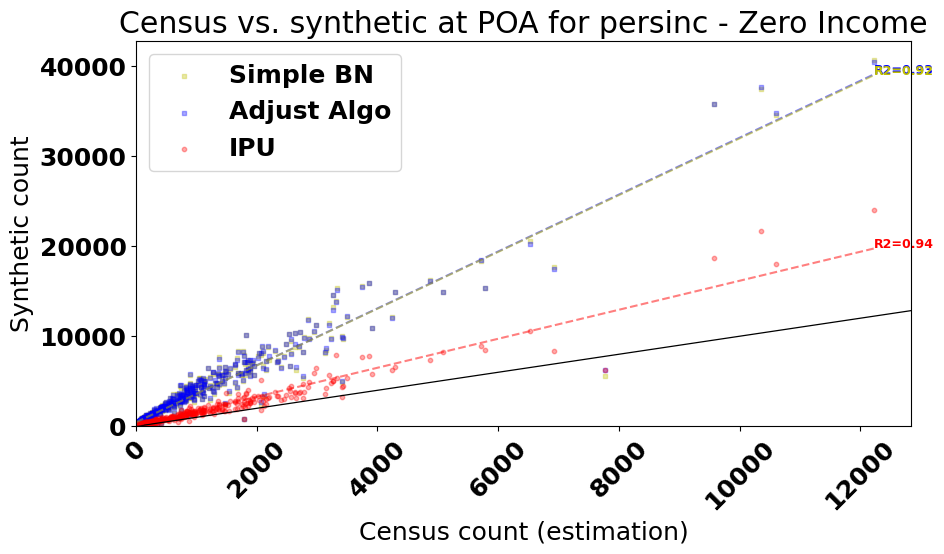

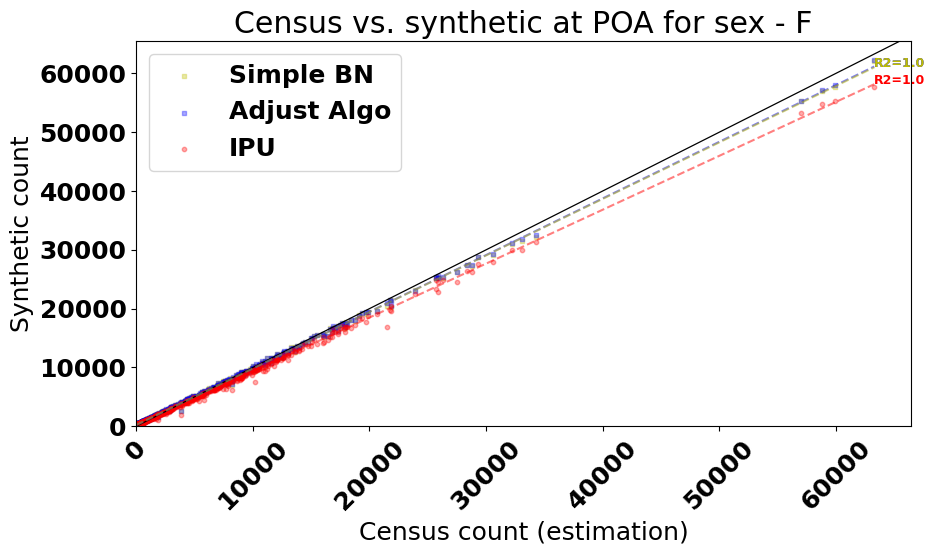

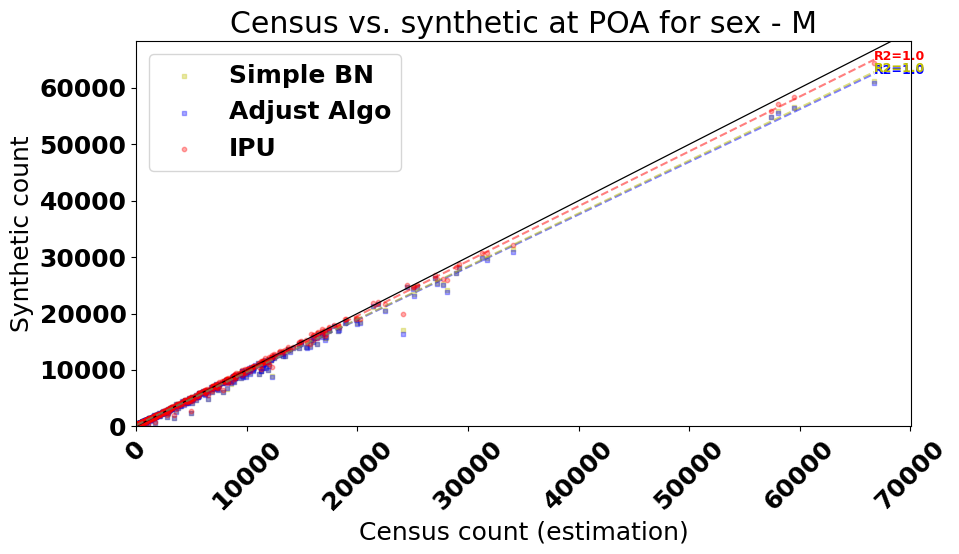

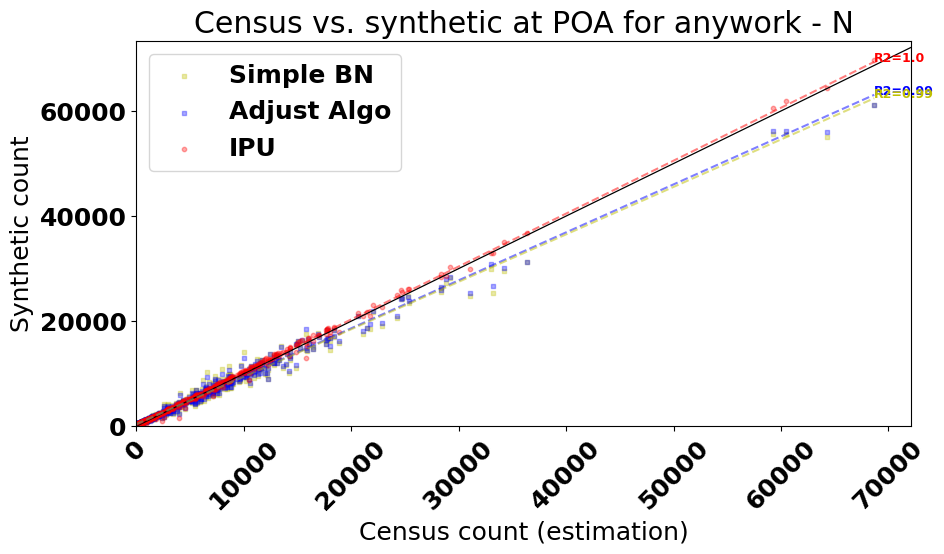

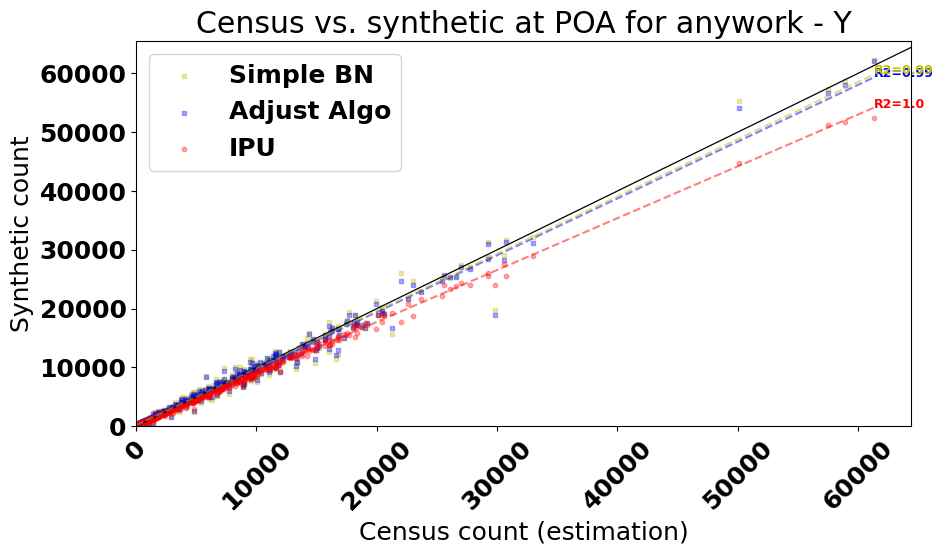

In [13]:
ls_atts = marg_pp.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    syn_check_bn = syn_pp_bn.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_noad = syn_pp_noad.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_pp_ipu.groupby(chosen_att)["geog"].value_counts()
    att_df = marg_pp[marg_pp.columns[marg_pp.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
            if (val, poa) in syn_check_bn.index:
                to_plot[val][2].append(syn_check_bn[(val, poa)])
            else:
                to_plot[val][2].append(0)
            if (val, poa) in syn_check_noad.index:
                to_plot[val][3].append(syn_check_noad[(val, poa)])
            else:
                to_plot[val][3].append(0)


    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_bn = list(to_plot[val][2])
        y_noad = list(to_plot[val][3])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_noad, s=10, c='y', marker="s", label='Simple BN', alpha=0.33)
        ax1.scatter(x, y_bn, s=10, c='b', marker="s", label='Adjust Algo', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_bn = np.poly1d(np.polyfit(x[0], y_bn, 1))(np.unique(x[0]))
        y_best_fit_noad = np.poly1d(np.polyfit(x[0], y_noad, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_bn, c='b', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_noad, c='y', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_bn = r_squared(x[0], y_bn, 1)["determination"]
        r_s_noad = r_squared(x[0], y_noad, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_bn), f"R2={round(r_s_bn, 2)}", size=9, c="b")
        ax1.text(max(x[0]), max(y_best_fit_noad), f"R2={round(r_s_noad, 2)}", size=9, c="y")
        
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        # plt.show()
        plt.savefig(f'./output/imgs/{chosen_att}_{val}_census_compa.png')

In [14]:
ls_zones = marg_hh.index
ls_atts = marg_hh.columns.get_level_values(0).unique()

d_df_states = []
d_df_atts = []

name_states = []
name_atts = []
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]

    gb_bn = syn_hh_bn[[geo_lev, chosen_att]].value_counts()
    gb_noad = syn_hh_noad[[geo_lev, chosen_att]].value_counts()
    gb_ipu = syn_hh_ipu[["geog", chosen_att]].value_counts()

    ls_states = att_df.columns.get_level_values(1)
    sum_err_att = np.zeros(3)
    for state in ls_states:
        sum_err_zone = np.zeros(3)
        for zone in ls_zones:
            val_census = marg_hh[(chosen_att, state)][zone]
            val_bn = gb_bn[(str(zone), state)] if (str(zone), state) in gb_bn.index else 0
            val_noad = gb_noad[(str(zone), state)] if (str(zone), state) in gb_noad.index else 0
            val_ipu = gb_ipu[(str(zone), state)] if (str(zone), state) in gb_ipu.index else 0
            ls_deal = np.array([val_ipu, val_noad, val_bn])
            sum_err_zone += (ls_deal - val_census)**2
        state_err = np.sqrt(sum_err_zone / len(ls_zones))
        name_states.append(f"{chosen_att}_{state}")
        d_df_states.append(state_err)
        sum_err_att += state_err
    att_avg_err = sum_err_att / len(ls_zones)
    name_atts.append(chosen_att)
    d_df_atts.append(att_avg_err)

order_cols = ["SRMSE_IPU", "SRMSE_simple_BN", "SRMSE_adjustment_algo"]
hh_states_df = pd.DataFrame(d_df_states, columns=order_cols, index=name_states)
hh_atts_df = pd.DataFrame(d_df_atts, columns=order_cols, index=name_atts)

In [15]:
hh_atts_df["simpleBN_to_IPU"] = (hh_atts_df["SRMSE_simple_BN"] - hh_atts_df["SRMSE_IPU"])/hh_atts_df["SRMSE_IPU"]
hh_atts_df["adjustment_to_IPU"] = (hh_atts_df["SRMSE_adjustment_algo"] - hh_atts_df["SRMSE_IPU"])/hh_atts_df["SRMSE_IPU"]
hh_atts_df["adjustment_to_simpleBN"] = (hh_atts_df["SRMSE_adjustment_algo"] - hh_atts_df["SRMSE_simple_BN"])/hh_atts_df["SRMSE_simple_BN"]

hh_states_df["simpleBN_to_IPU"] = (hh_states_df["SRMSE_simple_BN"] - hh_states_df["SRMSE_IPU"])/hh_states_df["SRMSE_IPU"]
hh_states_df["adjustment_to_IPU"] = (hh_states_df["SRMSE_adjustment_algo"] - hh_states_df["SRMSE_IPU"])/hh_states_df["SRMSE_IPU"]
hh_states_df["adjustment_to_simpleBN"] = (hh_states_df["SRMSE_adjustment_algo"] - hh_states_df["SRMSE_simple_BN"])/hh_states_df["SRMSE_simple_BN"]

In [16]:
hh_atts_df

SRMSE_IPU  SRMSE_simple_BN  SRMSE_adjustment_algo  simpleBN_to_IPU  \
hhsize      0.113459         0.000055               0.000000        -0.999515   
dwelltype   0.148672         5.144347               0.873005        33.601973   
hhinc       0.191654         4.005678               1.955351        19.900578   
totalvehs   0.074691         2.230576               0.966030        28.863973   
owndwell    0.080587         3.567950               3.182439        43.274767   

           adjustment_to_IPU  adjustment_to_simpleBN  
hhsize             -1.000000               -1.000000  
dwelltype           4.872016               -0.830298  
hhinc               9.202511               -0.511855  
totalvehs          11.933643               -0.566915  
owndwell           38.490954               -0.108048

In [17]:
ls_zones = marg_pp.index
ls_atts = marg_pp.columns.get_level_values(0).unique()

d_df_states = []
d_df_atts = []

name_states = []
name_atts = []
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    att_df = marg_pp[marg_pp.columns[marg_pp.columns.get_level_values(0)==chosen_att]]

    gb_bn = syn_pp_bn[[geo_lev, chosen_att]].value_counts()
    gb_noad = syn_pp_noad[[geo_lev, chosen_att]].value_counts()
    gb_ipu = syn_pp_ipu[["geog", chosen_att]].value_counts()

    ls_states = att_df.columns.get_level_values(1)
    sum_err_att = np.zeros(3)
    for state in ls_states:
        sum_err_zone = np.zeros(3)
        for zone in ls_zones:
            val_census = marg_pp[(chosen_att, state)][zone]
            val_bn = gb_bn[(str(zone), state)] if (str(zone), state) in gb_bn.index else 0
            val_noad = gb_noad[(str(zone), state)] if (str(zone), state) in gb_noad.index else 0
            val_ipu = gb_ipu[(str(zone), state)] if (str(zone), state) in gb_ipu.index else 0
            ls_deal = np.array([val_ipu, val_noad, val_bn])
            sum_err_zone += (ls_deal - val_census)**2
        state_err = np.sqrt(sum_err_zone / len(ls_zones))
        name_states.append(f"{chosen_att}_{state}")
        d_df_states.append(state_err)
        sum_err_att += state_err
    att_avg_err = sum_err_att / len(ls_zones)
    name_atts.append(chosen_att)
    d_df_atts.append(att_avg_err)

order_cols = ["SRMSE_IPU", "SRMSE_simple_BN", "SRMSE_adjustment_algo"]
pp_states_df = pd.DataFrame(d_df_states, columns=order_cols, index=name_states)
pp_atts_df = pd.DataFrame(d_df_atts, columns=order_cols, index=name_atts)

In [18]:
pp_states_df["simpleBN_to_IPU"] = (pp_states_df["SRMSE_simple_BN"] - pp_states_df["SRMSE_IPU"])/pp_states_df["SRMSE_IPU"]
pp_states_df["adjustment_to_IPU"] = (pp_states_df["SRMSE_adjustment_algo"] - pp_states_df["SRMSE_IPU"])/pp_states_df["SRMSE_IPU"]
pp_states_df["adjustment_to_simpleBN"] = (pp_states_df["SRMSE_adjustment_algo"] - pp_states_df["SRMSE_simple_BN"])/pp_states_df["SRMSE_simple_BN"]

pp_atts_df["simpleBN_to_IPU"] = (pp_atts_df["SRMSE_simple_BN"] - pp_atts_df["SRMSE_IPU"])/pp_atts_df["SRMSE_IPU"]
pp_atts_df["adjustment_to_IPU"] = (pp_atts_df["SRMSE_adjustment_algo"] - pp_atts_df["SRMSE_IPU"])/pp_atts_df["SRMSE_IPU"]
pp_atts_df["adjustment_to_simpleBN"] = (pp_atts_df["SRMSE_adjustment_algo"] - pp_atts_df["SRMSE_simple_BN"])/pp_atts_df["SRMSE_simple_BN"]

In [19]:
pp_atts_df

SRMSE_IPU  SRMSE_simple_BN  SRMSE_adjustment_algo  simpleBN_to_IPU  \
age       4.761054         6.996972               6.736778         0.469627   
persinc  12.063411        16.144520              15.154597         0.338305   
sex       1.544631         1.387255               1.418798        -0.101886   
anywork   2.011051         2.771807               2.460416         0.378288   

         adjustment_to_IPU  adjustment_to_simpleBN  
age               0.414976               -0.037187  
persinc           0.256245               -0.061316  
sex              -0.081465                0.022737  
anywork           0.223448               -0.112342

In [20]:
len(syn_pp_ipu)

6307699

In [21]:
len(syn_pp_noad)

6425659

In [22]:
pp_atts_df.to_csv("./pp_atts.csv")

In [23]:
pp_states_df.to_csv("./pp_states.csv")
hh_states_df.to_csv("./hh_states.csv")
hh_atts_df.to_csv("./hh_atts.csv")

In [24]:
marg_hh = marg_hh[marg_hh.columns[~marg_hh.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]]
marg_pp = marg_pp[marg_pp.columns[~marg_pp.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]]
marg_pp

age                                                         ...  \
       0-9 10-19 100+  20-29  30-39 40-49 50-59 60-69 70-79 80-89  ...   
POA                                                                ...   
3000  1131  2057    0  21588  10739  3433  2059  1275   619   145  ...   
3002   210   179    0    840   1032   571   614   683   537   165  ...   
3003   428   383    0   2836   2328   921   561   306   163    42  ...   
3004   604   407    9   2432   2928  1530  1111  1048   953   317  ...   
3006  1107   709    0   7932   7118  2452  1454  1108   612   187  ...   
...    ...   ...  ...    ...    ...   ...   ...   ...   ...   ...  ...   
3990     3     7    0      7     13    13    25    24    24     0  ...   
3991    29    46    0     41     45    40    69    57    50    11  ...   
3992   146   144    0    130    156   164   164   232   106    25  ...   
3995  1052  1200    4   1047   1162  1179  1494  1934  1567   687  ...   
3996   654   654    3    368    606   651   780  1267  1062   427  ...   

           persinc                                              \
     $400-599 p.w. $600-799 p.w. $800-999 p.w. Missing/Refused   
POA                                                              
3000          4049          4688          3585            5585   
3002           274           330           239             621   
3003           564           712           604            1185   
3004           983          1107           699            1967   
3006          1460          1933          1709            2693   
...            ...           ...           ...             ...   
3990             8            15             5              22   
3991            39            32            26             105   
3992           140           136            99             311   
3995          1846          1408           781            2459   
3996           793           718           429            1392   

                                    sex        anywork         
     Negative Income Zero Income      F      M       N      Y  
POA                                                            
3000             227        7764  21539  24113   15840  29812  
3002              24         686   2545   2837    1845   3537  
3003              29         620   3906   4070    2581   5395  
3004              36         737   5827   6478    4560   7745  
3006              73        2119  11197  11941    6568  16570  
...              ...         ...    ...    ...     ...    ...  
3990               3           9     62     54      45     71  
3991               6          27    193    195     204    184  
3992              10          55    628    643     602    669  
3995              73         556   5961   5532    6693   4800  
3996              37         312   3409   3152    3825   2736  

[691 rows x 28 columns]

In [25]:
# Creating the marg version of the synthetic, this should make it easier
def create_syn_marg_data(syn_data, columns_census, index_census, geog):
    # process syn_data to dict
    ls_atts = list(columns_census.get_level_values(0).unique()) # gotta match between census and synthetic

    hold_dict = {}
    for att in ls_atts:
        sub_counts = syn_data[[geog, att]].value_counts()
        for comb in sub_counts.index:
            hold_dict[f"{comb[0]}_{att}_{comb[1]}"] = sub_counts[comb]
    
    fi_arr = [[] for _ in range(len(index_census))]
    for i, zone in enumerate(index_census):
        for col in columns_census:
            name = f"{zone}_{col[0]}_{col[1]}"
            val = hold_dict[name] if name in hold_dict else 0
            fi_arr[i].append(val)
    
    df_fi = pd.DataFrame(fi_arr, index=index_census, columns=columns_census)
    return df_fi

In [26]:
marg_syn_hh_bn = create_syn_marg_data(syn_hh_bn, marg_hh.columns, marg_hh.index, "POA")
marg_syn_pp_bn = create_syn_marg_data(syn_pp_bn, marg_pp.columns, marg_pp.index, "POA")
marg_syn_hh_ipu = create_syn_marg_data(syn_hh_ipu, marg_hh.columns, marg_hh.index, "geog")
marg_syn_pp_ipu = create_syn_marg_data(syn_pp_ipu, marg_pp.columns, marg_pp.index, "geog")
marg_syn_hh_noad = create_syn_marg_data(syn_hh_noad, marg_hh.columns, marg_hh.index, "POA")
marg_syn_pp_noad = create_syn_marg_data(syn_pp_noad, marg_pp.columns, marg_pp.index, "POA")

In [27]:
def compare_vals_census(syn_marg_df, census_df):
    # We can loop through the each index to have the score comparison of each att at each zone
    # Then we can avg out to have the score for each att
    ls_atts = list(census_df.columns.get_level_values(0).unique()) # same between census and synthetic
    ls_zones = census_df.index
    dict_vals = {}
    for att in ls_atts:
        sub_syn = syn_marg_df[syn_marg_df.columns[syn_marg_df.columns.get_level_values(0)==att]].to_numpy()
        sub_census = census_df[census_df.columns[census_df.columns.get_level_values(0)==att]].to_numpy()
        for i in range(len(ls_zones)):
            dict_vals[f"{ls_zones[i]}_{att}"] = jensenshannon(sub_census[i], sub_syn[i], base=2)
    return dict_vals

a = compare_vals_census(marg_syn_hh_bn, marg_hh)
print(a)

{'3000_hhsize': 0.0, '3002_hhsize': 0.0, '3003_hhsize': 0.0, '3004_hhsize': 0.0, '3006_hhsize': 0.0, '3008_hhsize': 0.0, '3011_hhsize': 0.0, '3012_hhsize': 0.0, '3013_hhsize': 0.0, '3015_hhsize': 0.0, '3016_hhsize': 0.0, '3018_hhsize': 0.0, '3019_hhsize': 0.0, '3020_hhsize': 0.0, '3021_hhsize': 0.0, '3022_hhsize': 0.0, '3023_hhsize': 0.0, '3024_hhsize': 0.0, '3025_hhsize': 0.0, '3026_hhsize': 0.0, '3027_hhsize': 0.0, '3028_hhsize': 0.0, '3029_hhsize': 0.0, '3030_hhsize': 0.0, '3031_hhsize': 0.0, '3032_hhsize': 0.0, '3033_hhsize': 0.0, '3034_hhsize': 0.0, '3036_hhsize': 0.0, '3037_hhsize': 0.0, '3038_hhsize': 0.0, '3039_hhsize': 0.0, '3040_hhsize': 0.0, '3041_hhsize': 0.0, '3042_hhsize': 0.0, '3043_hhsize': 0.0, '3044_hhsize': 0.0, '3045_hhsize': 0.0, '3046_hhsize': 0.0, '3047_hhsize': 0.0, '3048_hhsize': 0.0, '3049_hhsize': 0.0, '3051_hhsize': 0.0, '3052_hhsize': 0.0, '3053_hhsize': 0.0, '3054_hhsize': 0.0, '3055_hhsize': 0.0, '3056_hhsize': 0.0, '3057_hhsize': 0.0, '3058_hhsize': 0.0,

In [28]:
compare_hh_bn = compare_vals_census(marg_syn_hh_bn, marg_hh)
compare_pp_bn = compare_vals_census(marg_syn_pp_bn, marg_pp)
compare_hh_ipu = compare_vals_census(marg_syn_hh_ipu, marg_hh)
compare_pp_ipu = compare_vals_census(marg_syn_pp_ipu, marg_pp)
compare_hh_noad = compare_vals_census(marg_syn_hh_noad, marg_hh)
compare_pp_noad = compare_vals_census(marg_syn_pp_noad, marg_pp)

In [29]:
import statistics as stat
ls_atts = list(marg_hh.columns.get_level_values(0).unique())
ls_data = []
for att in ls_atts:
    ls_com = []
    for com in [compare_hh_ipu, compare_hh_noad, compare_hh_bn]:
        ls_com_att = [com[x] for x in com if att in x and str(com[x]) != "nan" and str(com[x]) != "inf"]
        avg_val = stat.mean(ls_com_att)
        ls_com.append(avg_val)
    ls_data.append(ls_com)

pd.DataFrame(ls_data, columns=[ "IPU", "SimpleBN", "AA"], index=ls_atts)

IPU  SimpleBN        AA
hhsize     0.068589  0.000004  0.000000
dwelltype  0.072908  0.307367  0.095054
hhinc      0.095846  0.292800  0.209665
totalvehs  0.035517  0.148905  0.075984
owndwell   0.041616  0.257933  0.248475

In [30]:
ls_atts = list(marg_pp.columns.get_level_values(0).unique())
ls_data = []
for att in ls_atts:
    ls_com = []
    for com in [compare_pp_ipu, compare_pp_noad, compare_pp_bn]:
        ls_com_att = [com[x] for x in com if att in x and str(com[x]) != "nan" and str(com[x]) != "inf"]
        avg_val = stat.mean(ls_com_att)
        ls_com.append(avg_val)
    ls_data.append(ls_com)

pd.DataFrame(ls_data, columns=[ "IPU", "SimpleBN", "AA"], index=ls_atts)

IPU  SimpleBN        AA
age      0.133613  0.195575  0.196021
persinc  0.379019  0.452962  0.452539
sex      0.015728  0.019740  0.020911
anywork  0.052055  0.051262  0.051196